[data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [2]:
# import
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

# pythonize columns
train.columns = [x.lower().replace(' ','_').replace('/','_') for x in train.columns]
test.columns = [x.lower().replace(' ','_').replace('/','_') for x in test.columns]

# drop id and set pid as index
train.set_index('pid', inplace = True)
train.drop('id', axis = 1, inplace = True)

test.set_index('pid', inplace = True)
test.drop('id', axis = 1, inplace = True)


train.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
pid,,,,,,,,,,,,,,,,,,,,,
533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
train.columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod_add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'gara

In [4]:
train.shape

(2051, 79)

In [5]:
test.shape

(878, 78)

# Review target column

In [6]:
train.saleprice.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [7]:
saleprice_mean = train.saleprice.describe()['mean']
saleprice_std = train.saleprice.describe()['std']

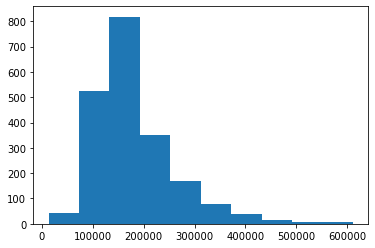

In [8]:
# plot it
plt.hist(train.saleprice);

# Review Data and Individual Columns for Outliers, etc.

##  Cols [0,10] . finished [0,5]

In [9]:
train.dtypes[:10]

ms_subclass       int64
ms_zoning        object
lot_frontage    float64
lot_area          int64
street           object
alley            object
lot_shape        object
land_contour     object
utilities        object
lot_config       object
dtype: object

**Observations**
  *  `ms_subclass` should be an object so we don't lose leading zeroes

In [10]:
# check for nulls
train.isnull().sum()[:10]

ms_subclass        0
ms_zoning          0
lot_frontage     330
lot_area           0
street             0
alley           1911
lot_shape          0
land_contour       0
utilities          0
lot_config         0
dtype: int64

In [11]:
test.isnull().sum()[:10]

ms_subclass       0
ms_zoning         0
lot_frontage    160
lot_area          0
street            0
alley           820
lot_shape         0
land_contour      0
utilities         0
lot_config        0
dtype: int64

**Observations**
1. `alley` has 1911 nulls out of 2051 records. Consider turning this into a dummy for alley or no alley
2. `lot_frontage` has 16% null coverage .. possibly due to apartments?
3. Everything else looks good!

In [12]:
train.lot_frontage.describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

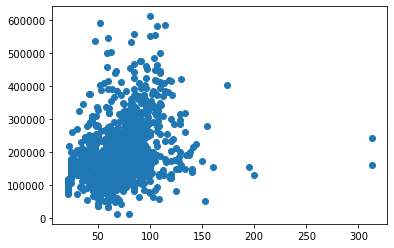

In [13]:
# plot it
plt.scatter(train.lot_frontage, train.saleprice);

In [14]:
# impute lot_frontage with the mean
lot_frontage_mean = train.lot_frontage.describe()['mean']

train.lot_frontage = train.lot_frontage.map(lambda x: lot_frontage_mean if pd.isnull(x) else x)
test.lot_frontage = test.lot_frontage.map(lambda x: lot_frontage_mean if pd.isnull(x) else x)

train.lot_frontage.describe()

count    2051.000000
mean       69.055200
std        21.306357
min        21.000000
25%        60.000000
50%        69.055200
75%        78.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [15]:
# review alley
train.alley.unique()

train.alley.map(lambda x: 0 if pd.isnull(x) else x).value_counts(normalize=True)

0       0.931741
Grvl    0.041443
Pave    0.026816
Name: alley, dtype: float64

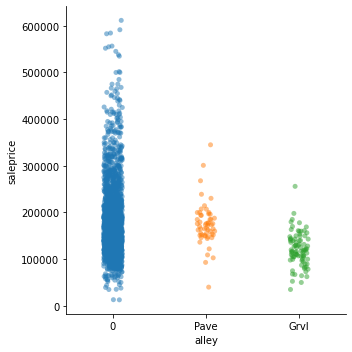

In [16]:
sns.catplot(x="alley", y="saleprice", data=pd.DataFrame(train.alley.map(lambda x: 0 if pd.isnull(x) else x))\
            .join(train.saleprice),
             alpha = 0.5)


In [17]:
train.alley = train.alley.map(lambda x: 0 if pd.isnull(x) else 1)
test.alley = test.alley.map(lambda x: 0 if pd.isnull(x) else 1)

train.rename(columns = {'alley': 'has_alley'}, inplace = True)  
test.rename(columns = {'alley': 'has_alley'}, inplace = True) 

train.head().iloc[:,0:10]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,has_alley,lot_shape,land_contour,utilities,lot_config
pid,,,,,,,,,,
533352170,60,RL,69.0552,13517,Pave,0,IR1,Lvl,AllPub,CulDSac
531379050,60,RL,43.0000,11492,Pave,0,IR1,Lvl,AllPub,CulDSac
535304180,20,RL,68.0000,7922,Pave,0,Reg,Lvl,AllPub,Inside
916386060,60,RL,73.0000,9802,Pave,0,Reg,Lvl,AllPub,Inside
906425045,50,RL,82.0000,14235,Pave,0,IR1,Lvl,AllPub,Inside


In [18]:
# review ms_subclass

# add 0 and make a string
train.ms_subclass = ['0' + str(i) if len(str(i)) == 2 else str(i) for i in train.ms_subclass]
test.ms_subclass = ['0' + str(i) if len(str(i)) == 2 else str(i) for i in test.ms_subclass]

train.ms_subclass.unique()



array(['060', '020', '050', '180', '160', '070', '120', '190', '085',
       '030', '090', '080', '075', '045', '040', '150'], dtype=object)

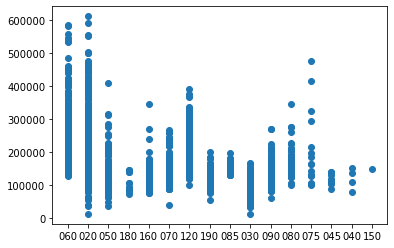

In [19]:
# see distribution for ms_subclass
plt.scatter(train.ms_subclass, train.saleprice);

**Observation**
  *  group these by saleprice mean into a few groups

In [20]:
train.saleprice.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

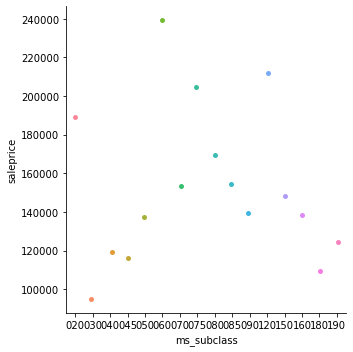

In [21]:
sns.catplot(x='ms_subclass', y = 'saleprice', data = pd.DataFrame(train.groupby('ms_subclass').mean().saleprice).reset_index())

**Observations**
  *  Clear grouping for ms_subclasses above 180k .. close to the mean!
  *  Let's split ms_subclass into two groups, below mean and above mean

In [22]:
# ms_subclass_mean = train.ms_subclass.map(lambda x: 0 if pd.isnull(x) else 1)
# train['alley'] = is_alley
# train.rename(columns = {'alley': 'is_alley'}, inplace = True)  
# train.head()


ms_subclass_above_mean = train.ms_subclass.map(train.groupby('ms_subclass').mean().saleprice > saleprice_mean).astype(int)
test_ms_subclass_above_mean = test.ms_subclass.map(train.groupby('ms_subclass').mean().saleprice > saleprice_mean).astype(int)

train['ms_subclass_above_mean'] = ms_subclass_above_mean
test['ms_subclass_above_mean'] = test_ms_subclass_above_mean

In [23]:
# drop ms_subclass
train.drop('ms_subclass', axis = 1, inplace=True)
test.drop('ms_subclass', axis = 1, inplace=True)

train.head().iloc[:,0:10]

,ms_zoning,lot_frontage,lot_area,street,has_alley,lot_shape,land_contour,utilities,lot_config,land_slope
pid,,,,,,,,,,
533352170,RL,69.0552,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl
531379050,RL,43.0000,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl
535304180,RL,68.0000,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl
916386060,RL,73.0000,9802,Pave,0,Reg,Lvl,AllPub,Inside,Gtl
906425045,RL,82.0000,14235,Pave,0,IR1,Lvl,AllPub,Inside,Gtl


In [24]:
# review ms_zoning unique values
train.ms_zoning.unique()

# update C A and I to represent their zones from data dict
train.ms_zoning = train.ms_zoning.apply(lambda x: x[0] if len(x)>2 else x)
test.ms_zoning = test.ms_zoning.apply(lambda x: x[0] if len(x)>2 else x)

train.ms_zoning.unique()

array(['RL', 'RM', 'FV', 'C', 'A', 'RH', 'I'], dtype=object)

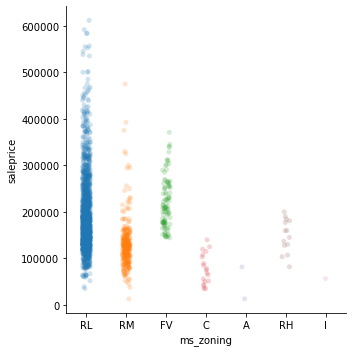

In [25]:
# see dispersion
sns.catplot(x = 'ms_zoning', y='saleprice', data = train, alpha = 0.2)

In [26]:
train.ms_zoning.value_counts(normalize=True)

RL    0.779132
RM    0.154071
FV    0.049244
C     0.009264
RH    0.006826
A     0.000975
I     0.000488
Name: ms_zoning, dtype: float64

In [27]:
# dummy RL and FV
train = train.join(pd.get_dummies(train.ms_zoning, prefix = 'ms_zoning')\
                   .loc[:,['ms_zoning_RL','ms_zoning_FV']])
test = test.join(pd.get_dummies(test.ms_zoning, prefix = 'ms_zoning')\
                   .loc[:,['ms_zoning_RL','ms_zoning_FV']])


train.head().iloc[:,-5:]

,sale_type,saleprice,ms_subclass_above_mean,ms_zoning_RL,ms_zoning_FV
pid,,,,,
533352170,WD,130500,1,1,0
531379050,WD,220000,1,1,0
535304180,WD,109000,1,1,0
916386060,WD,174000,1,1,0
906425045,WD,138500,0,1,0


In [28]:
# drop ms_zoning
train.drop('ms_zoning', axis=1, inplace=True)
test.drop('ms_zoning', axis=1, inplace=True)


train.head().iloc[:,0:10]

,lot_frontage,lot_area,street,has_alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood
pid,,,,,,,,,,
533352170,69.0552,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer
531379050,43.0000,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW
535304180,68.0000,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes
916386060,73.0000,9802,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Timber
906425045,82.0000,14235,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW


In [29]:
# review lot_frontage
train.lot_frontage.describe()

count    2051.000000
mean       69.055200
std        21.306357
min        21.000000
25%        60.000000
50%        69.055200
75%        78.000000
max       313.000000
Name: lot_frontage, dtype: float64

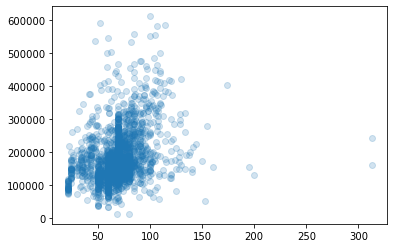

In [30]:
# plot lot_frontage
plt.scatter(train.lot_frontage, train.saleprice, alpha=0.2)

In [31]:
# drop two big outliers
train = train[train.lot_frontage < 250]
train.lot_area.describe()

count      2049.000000
mean      10030.358712
std        6628.642593
min        1300.000000
25%        7500.000000
50%        9405.000000
75%       11500.000000
max      159000.000000
Name: lot_area, dtype: float64

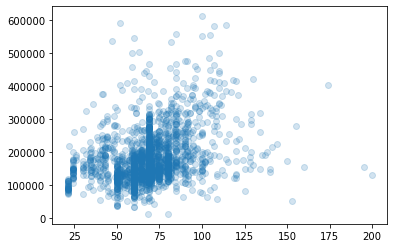

In [32]:
# plot lot_frontage
plt.scatter(train.lot_frontage, train.saleprice, alpha=0.2)

In [33]:
# review lot_area
train.lot_area.describe()

count      2049.000000
mean      10030.358712
std        6628.642593
min        1300.000000
25%        7500.000000
50%        9405.000000
75%       11500.000000
max      159000.000000
Name: lot_area, dtype: float64

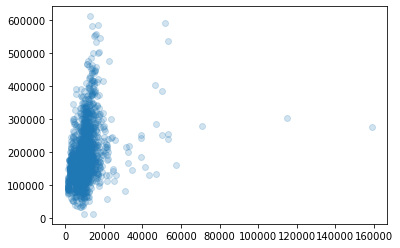

In [34]:
# plot lot_area
plt.scatter(train.lot_area, train.saleprice, alpha = 0.2);

In [35]:
# drop two big outliers
train = train[train.lot_area < 80_000]
train.lot_area.describe()

count     2047.000000
mean      9906.231558
std       5264.901142
min       1300.000000
25%       7500.000000
50%       9400.000000
75%      11500.000000
max      70761.000000
Name: lot_area, dtype: float64

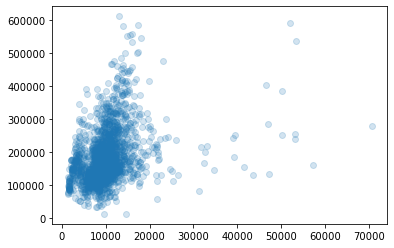

In [36]:
# plot lot_area
plt.scatter(train.lot_area, train.saleprice, alpha = 0.2);

In [37]:
# review street
train.street.unique()

array(['Pave', 'Grvl'], dtype=object)

**Observation**
only .3% of data set is not gravel, drop column

In [38]:
train.drop('street', axis=1, inplace=True)
test.drop('street', axis=1, inplace=True)

train.head()

,lot_frontage,lot_area,has_alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,...,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,ms_subclass_above_mean,ms_zoning_RL,ms_zoning_FV
pid,,,,,,,,,,,,,,,,,,,,,
533352170,69.0552,13517,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,NaN,NaN,0,3,2010,WD,130500,1,1,0
531379050,43.0000,11492,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,NaN,NaN,0,4,2009,WD,220000,1,1,0
535304180,68.0000,7922,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,NaN,NaN,0,1,2010,WD,109000,1,1,0
916386060,73.0000,9802,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,NaN,NaN,0,4,2010,WD,174000,1,1,0
906425045,82.0000,14235,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,NaN,NaN,0,3,2010,WD,138500,0,1,0


In [39]:
# is alley has already been covered

In [40]:
# review lot_shape
train.lot_shape.value_counts(normalize = True)

Reg    0.632633
IR1    0.338056
IR2    0.025403
IR3    0.003908
Name: lot_shape, dtype: float64

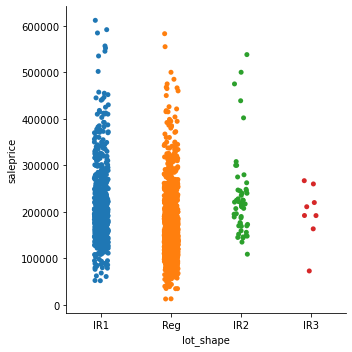

In [41]:
sns.catplot(x = 'lot_shape', y='saleprice', data=train)

**Observation** change to is_regular

In [42]:
train.groupby('lot_shape').mean().saleprice

lot_shape
IR1    211848.670520
IR2    231663.673077
IR3    197330.000000
Reg    162925.812355
Name: saleprice, dtype: float64

In [43]:
train.lot_shape = train.lot_shape.map(lambda x: x == 'Reg').astype(int)
test.lot_shape = test.lot_shape.map(lambda x: x == 'Reg').astype(int)

train.rename(columns = {'lot_shape': 'is_lot_shape_regluar'}, inplace=True)
test.rename(columns = {'lot_shape': 'is_lot_shape_regluar'}, inplace=True)

train.head().iloc[:,:10]

,lot_frontage,lot_area,has_alley,is_lot_shape_regluar,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1
pid,,,,,,,,,,
533352170,69.0552,13517,0,0,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe
531379050,43.0000,11492,0,0,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm
535304180,68.0000,7922,0,1,Lvl,AllPub,Inside,Gtl,NAmes,Norm
916386060,73.0000,9802,0,1,Lvl,AllPub,Inside,Gtl,Timber,Norm
906425045,82.0000,14235,0,0,Lvl,AllPub,Inside,Gtl,SawyerW,Norm


In [44]:
# review land_contour
train.land_contour.value_counts(normalize=True)

Lvl    0.900342
HLS    0.041036
Bnk    0.038593
Low    0.020029
Name: land_contour, dtype: float64

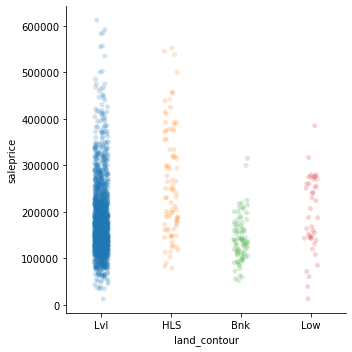

In [45]:
# plot
sns.catplot(x = 'land_contour', y= 'saleprice', data=train, alpha = 0.2);

In [46]:
train.groupby('land_contour').mean().saleprice

land_contour
Bnk    142651.924051
HLS    262595.678571
Low    194913.756098
Lvl    178998.564840
Name: saleprice, dtype: float64

In [47]:
# turn into is_land_countour_lvl
train.land_contour = train.land_contour.map(lambda x: x == 'Lvl').astype(int)
test.land_contour = test.land_contour.map(lambda x: x == 'Lvl').astype(int)

train.rename(columns = {'land_contour': 'is_land_contour_lvl'}, inplace=True)
test.rename(columns = {'land_contour': 'is_land_contour_lvl'}, inplace=True)

train.head().iloc[:,:10]

,lot_frontage,lot_area,has_alley,is_lot_shape_regluar,is_land_contour_lvl,utilities,lot_config,land_slope,neighborhood,condition_1
pid,,,,,,,,,,
533352170,69.0552,13517,0,0,1,AllPub,CulDSac,Gtl,Sawyer,RRAe
531379050,43.0000,11492,0,0,1,AllPub,CulDSac,Gtl,SawyerW,Norm
535304180,68.0000,7922,0,1,1,AllPub,Inside,Gtl,NAmes,Norm
916386060,73.0000,9802,0,1,1,AllPub,Inside,Gtl,Timber,Norm
906425045,82.0000,14235,0,0,1,AllPub,Inside,Gtl,SawyerW,Norm


In [48]:
# review utilities
train.utilities.unique()

train.utilities.value_counts(normalize=True)

AllPub    0.999023
NoSeWa    0.000489
NoSewr    0.000489
Name: utilities, dtype: float64

**Observation**
only .3% of data set is not AllPub, drop column

In [49]:
train.drop('utilities', axis=1, inplace=True)
test.drop('utilities', axis=1, inplace=True)

train.head().iloc[:,:10]

,lot_frontage,lot_area,has_alley,is_lot_shape_regluar,is_land_contour_lvl,lot_config,land_slope,neighborhood,condition_1,condition_2
pid,,,,,,,,,,
533352170,69.0552,13517,0,0,1,CulDSac,Gtl,Sawyer,RRAe,Norm
531379050,43.0000,11492,0,0,1,CulDSac,Gtl,SawyerW,Norm,Norm
535304180,68.0000,7922,0,1,1,Inside,Gtl,NAmes,Norm,Norm
916386060,73.0000,9802,0,1,1,Inside,Gtl,Timber,Norm,Norm
906425045,82.0000,14235,0,0,1,Inside,Gtl,SawyerW,Norm,Norm


In [50]:
# review lot config
train.lot_config.unique()

train.lot_config.value_counts(normalize=True)

Inside     0.733757
Corner     0.169516
CulDSac    0.063019
FR2        0.029311
FR3        0.004397
Name: lot_config, dtype: float64

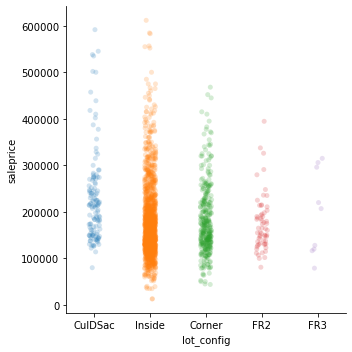

In [51]:
# plot
sns.catplot(x='lot_config', y='saleprice', data=train, alpha = 0.2);

**Observation**
  *  Breakout `Inside` and `Corner` separately.

In [52]:
# dummy
train = train.join(pd.get_dummies(train.lot_config, prefix = 'lot_config').loc[:,['lot_config_Inside','lot_config_Corner']])
test = test.join(pd.get_dummies(test.lot_config, prefix = 'lot_config').loc[:,['lot_config_Inside','lot_config_Corner']])

train.head().iloc[:,-5:]

,ms_subclass_above_mean,ms_zoning_RL,ms_zoning_FV,lot_config_Inside,lot_config_Corner
pid,,,,,
533352170,1,1,0,0,0
531379050,1,1,0,0,0
535304180,1,1,0,1,0
916386060,1,1,0,1,0
906425045,0,1,0,1,0


In [53]:
# drop lot config
train.drop('lot_config', axis=1, inplace=True)
test.drop('lot_config', axis=1, inplace=True)

train.head().iloc[:,:10]

,lot_frontage,lot_area,has_alley,is_lot_shape_regluar,is_land_contour_lvl,land_slope,neighborhood,condition_1,condition_2,bldg_type
pid,,,,,,,,,,
533352170,69.0552,13517,0,0,1,Gtl,Sawyer,RRAe,Norm,1Fam
531379050,43.0000,11492,0,0,1,Gtl,SawyerW,Norm,Norm,1Fam
535304180,68.0000,7922,0,1,1,Gtl,NAmes,Norm,Norm,1Fam
916386060,73.0000,9802,0,1,1,Gtl,Timber,Norm,Norm,1Fam
906425045,82.0000,14235,0,0,1,Gtl,SawyerW,Norm,Norm,1Fam


In [54]:
# double check
test.isnull().sum()[0:5]

lot_frontage            0
lot_area                0
has_alley               0
is_lot_shape_regluar    0
is_land_contour_lvl     0
dtype: int64

In [55]:
train.shape, test.shape

((2047, 79), (878, 78))

##  Cols [5,16] . finished [5,8]

In [56]:
train.columns[5:16]

Index(['land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod_add', 'roof_style'],
      dtype='object')

In [57]:
train.dtypes[5:16]

land_slope        object
neighborhood      object
condition_1       object
condition_2       object
bldg_type         object
house_style       object
overall_qual       int64
overall_cond       int64
year_built         int64
year_remod_add     int64
roof_style        object
dtype: object

In [58]:
# check for nulls
train.isnull().sum()[5:16]

# no nulls!

land_slope        0
neighborhood      0
condition_1       0
condition_2       0
bldg_type         0
house_style       0
overall_qual      0
overall_cond      0
year_built        0
year_remod_add    0
roof_style        0
dtype: int64

In [59]:
test.isnull().sum()[5:16]

land_slope        0
neighborhood      0
condition_1       0
condition_2       0
bldg_type         0
house_style       0
overall_qual      0
overall_cond      0
year_built        0
year_remod_add    0
roof_style        0
dtype: int64

In [60]:
# review land_slope
train.land_slope.unique()

train.land_slope.value_counts(normalize=True)

Gtl    0.953591
Mod    0.042501
Sev    0.003908
Name: land_slope, dtype: float64

In [61]:
# change to is_gtl

train.land_slope = train.land_slope.map(lambda x: x == 'Gtl').astype(int)
test.land_slope = test.land_slope.map(lambda x: x == 'Gtl').astype(int)

train.rename(columns = {'land_slope': 'land_slope_is_Gtl'}, inplace = True)
test.rename(columns = {'land_slope': 'land_slope_is_Gtl'}, inplace = True)

train.head().iloc[:,5:16]

,land_slope_is_Gtl,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style
pid,,,,,,,,,,,
533352170,1,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable
531379050,1,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable
535304180,1,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable
916386060,1,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable
906425045,1,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable


In [62]:
# review neighborhood
neighborhood_from_dict = ['Blmngtn','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards',\
                          'Gilbert','Greens','GrnHill','IDOTRR','Landmrk','MeadowV','Mitchel','Names','NoRidge',\
                          'NPkVill','NridgHt','NWAmes','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr',\
                          'Timber','Veenker']

train[~train.neighborhood.isin(neighborhood_from_dict)].neighborhood.unique()


array(['NAmes'], dtype=object)

In [63]:
# rename 'NAmes' to be 'Names' to match data dictionary
train.neighborhood = train.neighborhood.map(lambda x: 'Names' if x == 'NAmes' else x)
test.neighborhood = test.neighborhood.map(lambda x: 'Names' if x == 'NAmes' else x)

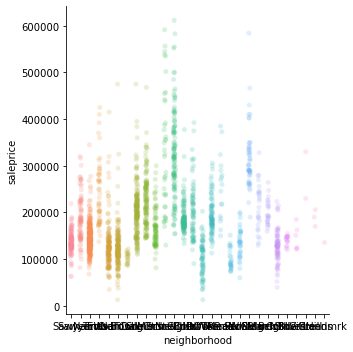

In [64]:
# plot
sns.catplot(x = 'neighborhood', y='saleprice', data = train, alpha = 0.2)

In [65]:
n_train = pd.DataFrame(train.neighborhood.map(train.groupby('neighborhood').mean().\
                                              saleprice.map(lambda x: 0 if x < saleprice_mean - saleprice_std\
                                                          else 1 if x < saleprice_mean\
                                                          else 2 if x <= saleprice_mean + saleprice_std
                                                          else 3 if x > saleprice_mean + saleprice_std
                                                          else np.nan)))
n_test = pd.DataFrame(test.neighborhood.map(train.groupby('neighborhood').mean()\
                                            .saleprice.map(lambda x: 0 if x < saleprice_mean - saleprice_std\
                                                                  else 1 if x < saleprice_mean\
                                                                  else 2 if x <= saleprice_mean + saleprice_std
                                                                  else 3 if x > saleprice_mean + saleprice_std
                                                                  else np.nan)))
        






n_train.rename(columns = {'neighborhood': 'n_id'}, inplace=True)
n_test.rename(columns = {'neighborhood': 'n_id'}, inplace=True)

n_train= n_train.join(train[['neighborhood', 'saleprice']])

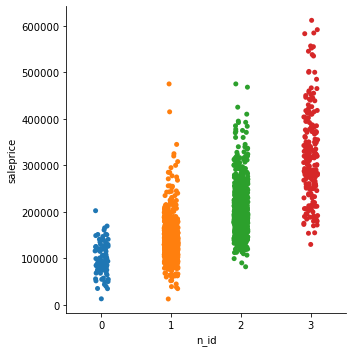

In [66]:
sns.catplot(x = 'n_id', y='saleprice', data = n_train)

**Observation**
  *  Split appears to be working as intended, add to train dataframe

In [67]:
train.shape

(2047, 79)

In [68]:
train = pd.merge(train,
             n_train[['n_id']],
             left_index = True,
             right_index = True)

In [69]:
train.shape

(2047, 80)

In [70]:
test.shape

(878, 78)

In [71]:
test = pd.merge(test,
             n_test[['n_id']],
             left_index = True,
             right_index = True)

In [72]:
test.shape

(878, 79)

In [73]:
# rename n_id
train.rename(columns = {'n_id': 'neighborhood_group'}, inplace=True)
test.rename(columns = {'n_id': 'neighborhood_group'}, inplace=True)


train.head().iloc[:,-5:]

,ms_zoning_RL,ms_zoning_FV,lot_config_Inside,lot_config_Corner,neighborhood_group
pid,,,,,
533352170,1,0,0,0,1
531379050,1,0,0,0,2
535304180,1,0,1,0,1
916386060,1,0,1,0,2
906425045,1,0,1,0,2


In [74]:
test.head().iloc[:,-5:]

,ms_zoning_RL,ms_zoning_FV,lot_config_Inside,lot_config_Corner,neighborhood_group
pid,,,,,
902301120,0,0,1,0,1
905108090,1,0,1,0,1
528218130,1,0,1,0,2
902207150,0,0,1,0,1
535105100,1,0,1,0,1


In [75]:
# now we can dummy by neighborhood_group
train = train.join(pd.get_dummies(train.neighborhood_group, prefix = 'neighborhood_group')\
                   .loc[:,['neighborhood_group_1','neighborhood_group_2','neighborhood_group_3']])
test = test.join(pd.get_dummies(test.neighborhood_group, prefix = 'neighborhood_group')\
                   .loc[:,['neighborhood_group_1','neighborhood_group_2','neighborhood_group_3']])


train.head().iloc[:,-5:]

,lot_config_Corner,neighborhood_group,neighborhood_group_1,neighborhood_group_2,neighborhood_group_3
pid,,,,,
533352170,0,1,1,0,0
531379050,0,2,0,1,0
535304180,0,1,1,0,0
916386060,0,2,0,1,0
906425045,0,2,0,1,0


In [76]:
# drop neighborhood
train.drop('neighborhood', axis=1, inplace = True)
test.drop('neighborhood', axis=1, inplace = True)

train.head().iloc[:,5:16]


,land_slope_is_Gtl,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl
pid,,,,,,,,,,,
533352170,1,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg
531379050,1,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg
535304180,1,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg
916386060,1,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg
906425045,1,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg


In [77]:
# review condition_1
train.condition_1.unique()

train.condition_1.value_counts()

Norm      1765
Feedr      108
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        11
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

In [78]:
# review condition_2
train.condition_2.unique()

train.condition_2.value_counts()

Norm      2021
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: condition_2, dtype: int64

In [79]:
pd.DataFrame(train.condition_1 + train.condition_2)[0].value_counts(normalize=True)

NormNorm        0.862237
FeedrNorm       0.049340
ArteryNorm      0.032731
RRAnNorm        0.013190
PosNNorm        0.011724
RRAeNorm        0.010259
PosANorm        0.004397
RRAnFeedr       0.003908
RRNnNorm        0.001954
RRNeNorm        0.001466
PosNPosN        0.001466
FeedrRRNn       0.000977
ArteryArtery    0.000977
FeedrFeedr      0.000977
PosAPosA        0.000977
FeedrRRAe       0.000489
RRNnFeedr       0.000489
ArteryPosA      0.000489
RRAnArtery      0.000489
RRNnArtery      0.000489
FeedrArtery     0.000489
FeedrRRAn       0.000489
Name: 0, dtype: float64

In [80]:
# get absolute membership

conditions = pd.DataFrame(train.condition_1 + ';' + train.condition_2,
                          columns = ['conditions'])

conditions.conditions.str.get_dummies(';').mean().sort_values()

RRNe      0.001466
RRNn      0.003908
PosA      0.005862
RRAe      0.010747
PosN      0.013190
RRAn      0.018075
Artery    0.035662
Feedr     0.057157
Norm      0.987298
dtype: float64

In [81]:
# consolidate condition_1 and condition_2 into is_condition_normal 
train = train.join(train.apply(lambda row: row.condition_1 == 'Norm' or row.condition_2 == 'Norm',
                               axis = 1)\
                   .rename('is_condition_normal'))

test = test.join(test.apply(lambda row: row.condition_1 == 'Norm' or row.condition_2 == 'Norm',
                               axis = 1)\
                   .rename('is_condition_normal'))

train.head().iloc[:,-5:]

,neighborhood_group,neighborhood_group_1,neighborhood_group_2,neighborhood_group_3,is_condition_normal
pid,,,,,
533352170,1,1,0,0,True
531379050,2,0,1,0,True
535304180,1,1,0,0,True
916386060,2,0,1,0,True
906425045,2,0,1,0,True


In [82]:
# drop condition columns
train.drop(['condition_1', 'condition_2'], axis = 1, inplace = True)
test.drop(['condition_1', 'condition_2'], axis = 1, inplace = True)

train.head().iloc[:,5:16]

,land_slope_is_Gtl,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd
pid,,,,,,,,,,,
533352170,1,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood
531379050,1,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd
535304180,1,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd
916386060,1,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd
906425045,1,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood


In [83]:
# review bldg_type
train.bldg_type.unique()

array(['1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex'], dtype=object)

In [84]:
train.bldg_type.value_counts(normalize=True)

1Fam      0.828530
TwnhsE    0.078652
Duplex    0.036639
Twnhs     0.033708
2fmCon    0.022472
Name: bldg_type, dtype: float64

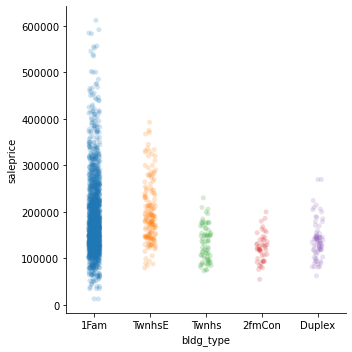

In [85]:
sns.catplot(x = 'bldg_type', y = 'saleprice', data = train, alpha = 0.2)

**Observation** make two dummies

In [86]:
train = train.join(pd.get_dummies(train.bldg_type, prefix = 'bldg_type').loc[:,['bldg_type_1Fam','bldg_type_TwnhsE']])
test = test.join(pd.get_dummies(test.bldg_type, prefix = 'bldg_type').loc[:,['bldg_type_1Fam','bldg_type_TwnhsE']])

train.head().iloc[:,-5:]

,neighborhood_group_2,neighborhood_group_3,is_condition_normal,bldg_type_1Fam,bldg_type_TwnhsE
pid,,,,,
533352170,0,0,True,1,0
531379050,1,0,True,1,0
535304180,0,0,True,1,0
916386060,1,0,True,1,0
906425045,1,0,True,1,0


In [87]:
# drop 'bldg_type'
train.drop('bldg_type', axis = 1, inplace = True)
test.drop('bldg_type', axis = 1, inplace = True)

train.head().iloc[:,5:16]

,land_slope_is_Gtl,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type
pid,,,,,,,,,,,
533352170,1,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace
531379050,1,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace
535304180,1,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None
916386060,1,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None
906425045,1,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None


In [88]:
# review house_style
sorted(train.house_style.unique())

train.house_style.value_counts(normalize=True)

1Story    0.516365
2Story    0.291646
1.5Fin    0.106009
SLvl      0.045921
SFoyer    0.024426
2.5Unf    0.006839
1.5Unf    0.005862
2.5Fin    0.002931
Name: house_style, dtype: float64

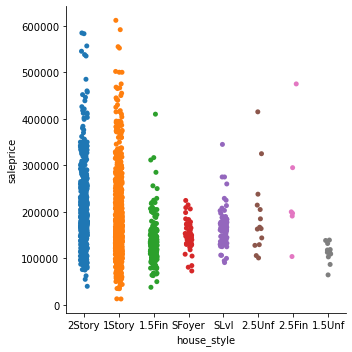

In [89]:
# plot
sns.catplot(x = 'house_style', y = 'saleprice', data = train)

In [90]:
# create 2 dummies
train = train.join(pd.get_dummies(train.house_style, prefix = 'house_style').loc[:,['house_style_2Story','house_style_1Story']])
test = test.join(pd.get_dummies(test.house_style, prefix = 'house_style').loc[:,['house_style_2Story','house_style_1Story']])

train.head().iloc[:,-5:]

,is_condition_normal,bldg_type_1Fam,bldg_type_TwnhsE,house_style_2Story,house_style_1Story
pid,,,,,
533352170,True,1,0,1,0
531379050,True,1,0,1,0
535304180,True,1,0,0,1
916386060,True,1,0,1,0
906425045,True,1,0,0,0


In [91]:
# drop house_style
train.drop('house_style', axis = 1, inplace = True)
test.drop('house_style', axis = 1, inplace = True)

train.head().iloc[:,5:16]

,land_slope_is_Gtl,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area
pid,,,,,,,,,,,
533352170,1,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0
531379050,1,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0
535304180,1,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0
916386060,1,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0
906425045,1,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0


In [92]:
# review overall qual
train.overall_qual.describe()

# looks good

count    2047.000000
mean        6.109428
std         1.424799
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: overall_qual, dtype: float64

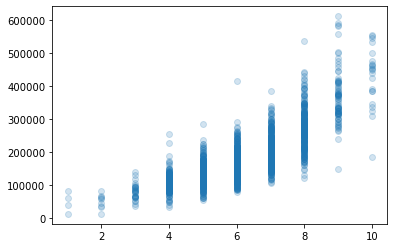

In [93]:
# plot
plt.scatter(x = train.overall_qual, y= train.saleprice, alpha = 0.2)

In [94]:
# review overall condition
train.overall_cond.describe()

# looks good

count    2047.000000
mean        5.561309
std         1.104522
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: overall_cond, dtype: float64

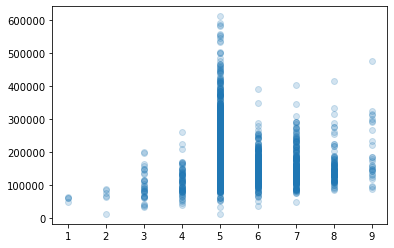

In [95]:
# plot
plt.scatter(x = train.overall_cond, y= train.saleprice, alpha = 0.2)

In [96]:
# review year built
train.year_built.describe()

# looks good

count    2047.000000
mean     1971.703957
std        30.194082
min      1872.000000
25%      1953.000000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: year_built, dtype: float64

In [97]:
# convert this to home_age
train['home_age'] = train.year_built.map(lambda x: 2010 - x)
test['home_age'] = test.year_built.map(lambda x: 2010 - x)

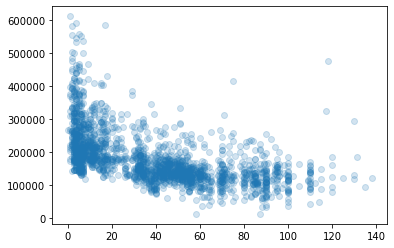

In [98]:
# plot
plt.scatter(x = train.home_age, y= train.saleprice, alpha = 0.2)

In [99]:
# review year remod
train.year_remod_add.value_counts()

1950    262
2006    138
2007    122
2005    100
2004     83
       ... 
1986      9
2010      8
1983      7
1981      6
1982      3
Name: year_remod_add, Length: 61, dtype: int64

In [100]:
# let's assume that no remodels were made the year the home was built. Create a bool for has_remodel
home_has_remodel = train.year_remod_add == train.year_built
test_home_has_remodel = test.year_remod_add == test.year_built

train['home_has_remodel'] = home_has_remodel.astype(int)
test['home_has_remodel'] = test_home_has_remodel.astype(int)



In [101]:
#drop year_built and year_remod_add
train.drop(['year_built','year_remod_add'], axis = 1, inplace = True)
test.drop(['year_built','year_remod_add'], axis = 1, inplace = True)

train.head().iloc[:,5:16]

,land_slope_is_Gtl,overall_qual,overall_cond,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond
pid,,,,,,,,,,,
533352170,1,6,8,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA
531379050,1,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA
535304180,1,5,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd
916386060,1,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA
906425045,1,6,8,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA


In [102]:
train.shape, test.shape

((2047, 83), (878, 82))

##  Cols [8:19] . finished [9:13]

In [103]:
train.columns[8:19]

Index(['roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd',
       'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'foundation', 'bsmt_qual', 'bsmt_cond'],
      dtype='object')

In [104]:
train.dtypes[8:19]

roof_style       object
roof_matl        object
exterior_1st     object
exterior_2nd     object
mas_vnr_type     object
mas_vnr_area    float64
exter_qual       object
exter_cond       object
foundation       object
bsmt_qual        object
bsmt_cond        object
dtype: object

In [105]:
# check for nulls
train.isnull().sum()[8:19]

roof_style       0
roof_matl        0
exterior_1st     0
exterior_2nd     0
mas_vnr_type    22
mas_vnr_area    22
exter_qual       0
exter_cond       0
foundation       0
bsmt_qual       55
bsmt_cond       55
dtype: int64

In [106]:
test.isnull().sum()[8:19]

roof_style       0
roof_matl        0
exterior_1st     0
exterior_2nd     0
mas_vnr_type     1
mas_vnr_area     1
exter_qual       0
exter_cond       0
foundation       0
bsmt_qual       25
bsmt_cond       25
dtype: int64

In [107]:
# review mas_vnr_type
train.mas_vnr_type.unique()

train.mas_vnr_type.map(lambda x: 0 if pd.isnull(x) else x).value_counts(normalize = True)

None       0.594529
BrkFace    0.307767
Stone      0.081094
0          0.010747
BrkCmn     0.005862
Name: mas_vnr_type, dtype: float64

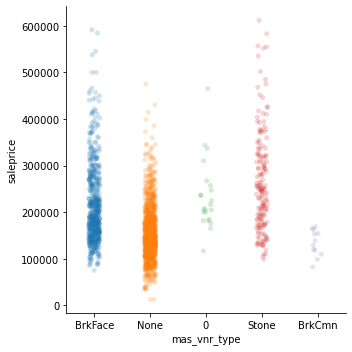

In [108]:
# plot it
sns.catplot(x = 'mas_vnr_type', y='saleprice',
            data=pd.DataFrame(train.mas_vnr_type.map(lambda x: 0 if pd.isnull(x) else x)).join(train.saleprice),
            alpha=0.2);

In [109]:
# rather than impute, make a dummy for Stone and BrkFace

In [110]:
train = train.join(pd.get_dummies(train.mas_vnr_type, prefix = 'mas_vnr_type')\
                   .loc[:,['mas_vnr_type_Stone','mas_vnr_type_BrkFace']])
test = test.join(pd.get_dummies(test.mas_vnr_type, prefix = 'mas_vnr_type')\
                   .loc[:,['mas_vnr_type_Stone','mas_vnr_type_BrkFace']])


train.head().iloc[:,-5:]

,house_style_1Story,home_age,home_has_remodel,mas_vnr_type_Stone,mas_vnr_type_BrkFace
pid,,,,,
533352170,0,34,0,0,1
531379050,0,14,0,0,1
535304180,1,57,0,0,0
916386060,0,4,0,0,0
906425045,0,110,0,0,0


In [111]:
# drop mas_vnr_type
train.drop('mas_vnr_type', axis=1, inplace=True)
test.drop('mas_vnr_type', axis=1, inplace=True)

train.head().iloc[:,9:19]

,roof_matl,exterior_1st,exterior_2nd,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure
pid,,,,,,,,,,
533352170,CompShg,HdBoard,Plywood,289.0,Gd,TA,CBlock,TA,TA,No
531379050,CompShg,VinylSd,VinylSd,132.0,Gd,TA,PConc,Gd,TA,No
535304180,CompShg,VinylSd,VinylSd,0.0,TA,Gd,CBlock,TA,TA,No
916386060,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No
906425045,CompShg,Wd Sdng,Plywood,0.0,TA,TA,PConc,Fa,Gd,No


In [112]:
# review mas_vnr_area
train.mas_vnr_area.describe()

count    2025.000000
mean       99.093333
std       174.149618
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: mas_vnr_area, dtype: float64

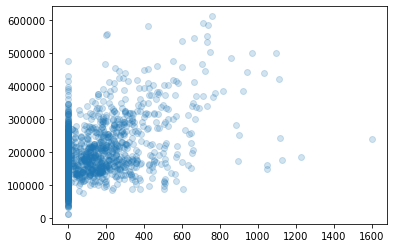

In [113]:
# plot
plt.scatter(train.mas_vnr_area, train.saleprice, alpha = 0.2)

In [114]:
# impute nulls with median
mas_vnr_area_median = train.mas_vnr_area.describe()['50%']

train.mas_vnr_area = train.mas_vnr_area.map(lambda x: mas_vnr_area_median if pd.isnull(x) else x)
test.mas_vnr_area = test.mas_vnr_area.map(lambda x: mas_vnr_area_median if pd.isnull(x) else x)


train.mas_vnr_area.describe()

count    2047.000000
mean       98.028334
std       173.512052
min         0.000000
25%         0.000000
50%         0.000000
75%       158.000000
max      1600.000000
Name: mas_vnr_area, dtype: float64

In [115]:
# review bsmt_qual
train.bsmt_qual.unique()

train.bsmt_qual.map(lambda x: 0 if pd.isnull(x) else x).value_counts()

TA    887
Gd    861
Ex    183
Fa     60
0      55
Po      1
Name: bsmt_qual, dtype: int64

In [116]:
# there are a lot of basement things, let's look at all of them and create some helpers
basements = train[['bsmt_qual','bsmt_cond', 'bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2','bsmtfin_sf_2',\
                  'bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

In [117]:
basements.isnull().sum()

bsmt_qual         55
bsmt_cond         55
bsmt_exposure     58
bsmtfin_type_1    55
bsmtfin_sf_1       1
bsmtfin_type_2    56
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
bsmt_full_bath     2
bsmt_half_bath     2
dtype: int64

**Observations**
  *  `bsmt_exposure` includes unfinished basements
  *  `bsmt_qual` has 55 nulls which are uniform across all basement categories (either as null or 0). This can be expanded out
      to a "has_basement" indicator

In [118]:
# impute bsmt_qual with 'NA'
train.bsmt_qual = train.bsmt_qual.map(lambda x: 'NA' if pd.isnull(x) else x)
test.bsmt_qual = test.bsmt_qual.map(lambda x: 'NA' if pd.isnull(x) else x)

In [119]:
# create "has_basement"
train['has_basement'] = train.bsmt_qual != 'NA'
test['has_basement'] = test.bsmt_qual != 'NA'

train.has_basement = train.has_basement.map(lambda x: x).astype(int)
test.has_basement = test.has_basement.map(lambda x: x).astype(int)

train.has_basement.value_counts()

1    1992
0      55
Name: has_basement, dtype: int64

In [120]:
# review roof_style
sorted(train.roof_style.unique())

train.roof_style.value_counts(normalize = True)

Gable      0.789936
Hip        0.193454
Flat       0.005862
Gambrel    0.005862
Mansard    0.003420
Shed       0.001466
Name: roof_style, dtype: float64

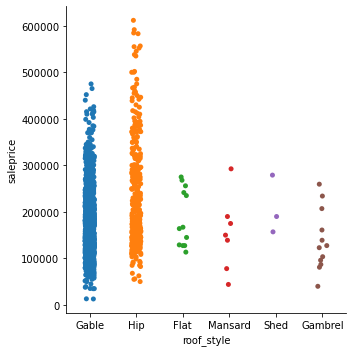

In [121]:
# plot
sns.catplot(x = 'roof_style', y='saleprice', data = train)

In [122]:
# create two dummies
train = train.join(pd.get_dummies(train.roof_style, prefix = 'roof_style').loc[:,['roof_style_Gable','roof_style_Hip']])
test = test.join(pd.get_dummies(test.roof_style, prefix = 'roof_style').loc[:,['roof_style_Gable','roof_style_Hip']])

In [123]:
# drop roof_style
train.drop('roof_style', axis = 1, inplace=True)
test.drop('roof_style', axis = 1, inplace=True)

train.head().iloc[:,9:19]

,exterior_1st,exterior_2nd,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1
pid,,,,,,,,,,
533352170,HdBoard,Plywood,289.0,Gd,TA,CBlock,TA,TA,No,GLQ
531379050,VinylSd,VinylSd,132.0,Gd,TA,PConc,Gd,TA,No,GLQ
535304180,VinylSd,VinylSd,0.0,TA,Gd,CBlock,TA,TA,No,GLQ
916386060,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf
906425045,Wd Sdng,Plywood,0.0,TA,TA,PConc,Fa,Gd,No,Unf


In [124]:
# review roof_matl
sorted(train.roof_matl.unique())

train.roof_matl.value_counts(normalize=True)

CompShg    0.988276
Tar&Grv    0.006839
WdShngl    0.002443
WdShake    0.001954
Membran    0.000489
Name: roof_matl, dtype: float64

In [125]:
# drop it
train.drop('roof_matl', axis = 1, inplace=True)
test.drop('roof_matl', axis = 1, inplace=True)


train.head().iloc[:,9:19]

,exterior_2nd,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1
pid,,,,,,,,,,
533352170,Plywood,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0
531379050,VinylSd,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0
535304180,VinylSd,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0
916386060,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0
906425045,Plywood,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0


In [126]:
# review exterior_1st
exterior_1st_from_dict = ['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc',\
                          'MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing']


train[~train.exterior_1st.isin(exterior_1st_from_dict)]

# looks good!

,lot_frontage,lot_area,has_alley,is_lot_shape_regluar,is_land_contour_lvl,land_slope_is_Gtl,overall_qual,overall_cond,exterior_1st,exterior_2nd,...,bldg_type_TwnhsE,house_style_2Story,house_style_1Story,home_age,home_has_remodel,mas_vnr_type_Stone,mas_vnr_type_BrkFace,has_basement,roof_style_Gable,roof_style_Hip
pid,,,,,,,,,,,,,,,,,,,,,


In [127]:
test[~test.exterior_1st.isin(exterior_1st_from_dict)]

,lot_frontage,lot_area,has_alley,is_lot_shape_regluar,is_land_contour_lvl,land_slope_is_Gtl,overall_qual,overall_cond,exterior_1st,exterior_2nd,...,bldg_type_TwnhsE,house_style_2Story,house_style_1Story,home_age,home_has_remodel,mas_vnr_type_Stone,mas_vnr_type_BrkFace,has_basement,roof_style_Gable,roof_style_Hip
pid,,,,,,,,,,,,,,,,,,,,,


In [128]:
# review exterior_2nd
train[~train.exterior_2nd.isin(exterior_1st_from_dict)].exterior_2nd.unique()

array(['CmentBd', 'Wd Shng', 'Brk Cmn'], dtype=object)

In [129]:
test[~test.exterior_2nd.isin(exterior_1st_from_dict)].exterior_2nd.unique()

array(['CmentBd', 'Wd Shng', 'Brk Cmn'], dtype=object)

In [130]:
# replace vals
train.exterior_2nd = ['CemntBd' if val == 'CmentBd' else 'WdShing' if val == 'Wd Shng' else 'BrkComm' if val == 'Brk Cmn'\
else val for val in train.exterior_2nd]

test.exterior_2nd = ['CemntBd' if val == 'CmentBd' else 'WdShing' if val == 'Wd Shng' else 'BrkComm' if val == 'Brk Cmn'\
else val for val in test.exterior_2nd]

train[~train.exterior_2nd.isin(exterior_1st_from_dict)].exterior_2nd.unique()

array([], dtype=object)

In [131]:
test[~test.exterior_2nd.isin(exterior_1st_from_dict)].exterior_2nd.unique()

array([], dtype=object)

In [132]:
# get absolute membership

exteriors = pd.DataFrame(train.exterior_1st + ';' + train.exterior_2nd, columns = ['exteriors'])
test_exteriors = pd.DataFrame(test.exterior_1st + ';' + test.exterior_2nd, columns = ['exteriors'])


exteriors.exteriors.str.get_dummies(';').mean().sort_values()

AsphShn    0.001466
CBlock     0.001466
Stone      0.003420
ImStucc    0.005374
BrkComm    0.008305
AsbShng    0.017587
Stucco     0.017587
BrkFace    0.032242
WdShing    0.036150
CemntBd    0.044455
Plywood    0.103566
Wd Sdng    0.146556
HdBoard    0.153884
MetalSd    0.163166
VinylSd    0.358085
dtype: float64

In [133]:
# make dummies for vinyl, metal, hd, wd, ply
exteriors = exteriors.exteriors.str.get_dummies(';').loc[:,['VinylSd','MetalSd','HdBoard','Wd Sdng','Plywood']]
test_exteriors = test_exteriors.exteriors.str.get_dummies(';').loc[:,['VinylSd','MetalSd','HdBoard','Wd Sdng','Plywood']]

exteriors.rename(columns = {col: 'exterior_has_'+col.replace(' ','_') for col in exteriors.columns}, inplace = True)
test_exteriors.rename(columns = {col: 'exterior_has_'+col.replace(' ','_') for col in test_exteriors.columns}, inplace = True)

train = train.join(exteriors)
test = test.join(test_exteriors)

train.head().iloc[:,-7:]

,roof_style_Gable,roof_style_Hip,exterior_has_VinylSd,exterior_has_MetalSd,exterior_has_HdBoard,exterior_has_Wd_Sdng,exterior_has_Plywood
pid,,,,,,,
533352170,1,0,0,0,1,0,1
531379050,1,0,1,0,0,0,0
535304180,1,0,1,0,0,0,0
916386060,1,0,1,0,0,0,0
906425045,1,0,0,0,0,1,1


In [134]:
# drop exterior cols
train.drop(['exterior_1st','exterior_2nd'], axis = 1, inplace = True)
test.drop(['exterior_1st','exterior_2nd'], axis = 1, inplace = True)

train.head().iloc[:,9:19]

,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2
pid,,,,,,,,,,
533352170,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0
531379050,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0
535304180,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0
916386060,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0
906425045,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0


In [135]:
# mas_vnr_type addressed earlier

In [136]:
# mas_vnr_area addressed earlier

In [137]:
# review exter_qual
train.exter_qual.unique()

train.exter_qual.value_counts(normalize=True)

TA    0.608207
Gd    0.340010
Ex    0.039082
Fa    0.012702
Name: exter_qual, dtype: float64

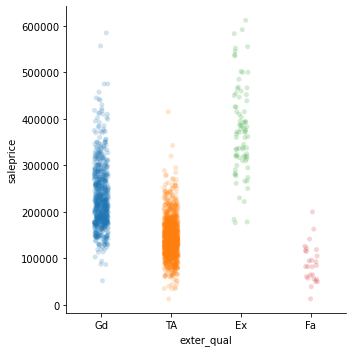

In [138]:
# plot it
sns.catplot(x = 'exter_qual', y='saleprice', data = train, alpha=0.2)

In [139]:
# dummy EX_GD together
train.exter_qual = train.exter_qual.map(lambda x: x == 'Gd' or x == 'Ex').astype(int)
test.exter_qual = test.exter_qual.map(lambda x: x == 'Gd' or x == 'Ex').astype(int)

train.rename(columns = {'exter_qual':'exter_qual_Ex_Gd'}, inplace=True)
test.rename(columns = {'exter_qual':'exter_qual_Ex_Gd'}, inplace=True)

train.head().iloc[:,9:19]

,exter_qual_Ex_Gd,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2
pid,,,,,,,,,,
533352170,1,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0
531379050,1,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0
535304180,0,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0
916386060,0,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0
906425045,0,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0


In [140]:
# review exter_cond
train.exter_cond.unique()

train.exter_cond.value_counts(normalize = True)

TA    0.866634
Gd    0.105032
Fa    0.023937
Ex    0.003420
Po    0.000977
Name: exter_cond, dtype: float64

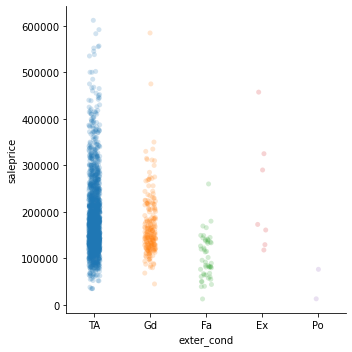

In [141]:
# plot it
sns.catplot(x = 'exter_cond', y='saleprice', data = train, alpha=0.2)

In [142]:
# dummy EX_GD together
train.exter_cond = train.exter_cond.map(lambda x: x == 'Gd' or x == 'Ex').astype(int)
test.exter_cond = test.exter_cond.map(lambda x: x == 'Gd' or x == 'Ex').astype(int)

train.rename(columns = {'exter_cond':'exter_cond_Ex_Gd'}, inplace=True)
test.rename(columns = {'exter_cond':'exter_cond_Ex_Gd'}, inplace=True)


train.head().iloc[:,9:19]

,exter_qual_Ex_Gd,exter_cond_Ex_Gd,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2
pid,,,,,,,,,,
533352170,1,0,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0
531379050,1,0,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0
535304180,0,1,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0
916386060,0,0,PConc,Gd,TA,No,Unf,0.0,Unf,0.0
906425045,0,0,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0


In [143]:
# review foundation
train.foundation.unique()

train.foundation.value_counts(normalize=True)

PConc     0.451881
CBlock    0.420127
BrkTil    0.107963
Slab      0.016610
Stone     0.002443
Wood      0.000977
Name: foundation, dtype: float64

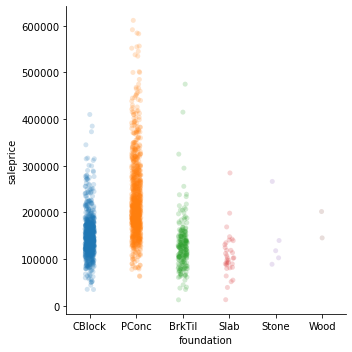

In [144]:
# plot it
sns.catplot(x = 'foundation', y='saleprice', data = train, alpha=0.2)

In [145]:
# dummy Pconc and Cblock
train = train.join(pd.get_dummies(train.foundation, prefix = 'foundation')\
                   .loc[:,['foundation_PConc','foundation_CBlock']])
test = test.join(pd.get_dummies(test.foundation, prefix = 'foundation')\
                   .loc[:,['foundation_PConc','foundation_CBlock']])


train.head().iloc[:,-5:]

,exterior_has_HdBoard,exterior_has_Wd_Sdng,exterior_has_Plywood,foundation_PConc,foundation_CBlock
pid,,,,,
533352170,1,0,1,0,1
531379050,0,0,0,1,0
535304180,0,0,0,0,1
916386060,0,0,0,1,0
906425045,0,1,1,1,0


In [146]:
#drop foundation
train.drop('foundation', axis=1, inplace=True)
test.drop('foundation', axis=1, inplace=True)

train.head().iloc[:,9:19]

,exter_qual_Ex_Gd,exter_cond_Ex_Gd,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf
pid,,,,,,,,,,
533352170,1,0,TA,TA,No,GLQ,533.0,Unf,0.0,192.0
531379050,1,0,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0
535304180,0,1,TA,TA,No,GLQ,731.0,Unf,0.0,326.0
916386060,0,0,Gd,TA,No,Unf,0.0,Unf,0.0,384.0
906425045,0,0,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0


In [147]:
# review bsmt_qual
train.bsmt_qual.unique()

train.bsmt_qual.value_counts(normalize=True)

TA    0.433317
Gd    0.420616
Ex    0.089399
Fa    0.029311
NA    0.026869
Po    0.000489
Name: bsmt_qual, dtype: float64

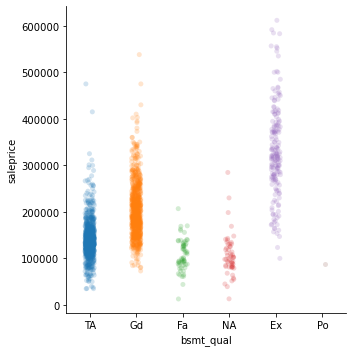

In [148]:
# plot it
sns.catplot(x = 'bsmt_qual', y='saleprice', data = train, alpha=0.2)

In [149]:
# dummy EX_GD together
train.bsmt_qual = train.bsmt_qual.map(lambda x: x == 'Gd' or x == 'Ex').astype(int)
test.bsmt_qual = test.bsmt_qual.map(lambda x: x == 'Gd' or x == 'Ex').astype(int)

train.rename(columns = {'bsmt_qual':'bsmt_qual_Ex_Gd'}, inplace=True)
test.rename(columns = {'bsmt_qual':'bsmt_qual_Ex_Gd'}, inplace=True)

train.head().iloc[:,9:19]

,exter_qual_Ex_Gd,exter_cond_Ex_Gd,bsmt_qual_Ex_Gd,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf
pid,,,,,,,,,,
533352170,1,0,0,TA,No,GLQ,533.0,Unf,0.0,192.0
531379050,1,0,1,TA,No,GLQ,637.0,Unf,0.0,276.0
535304180,0,1,0,TA,No,GLQ,731.0,Unf,0.0,326.0
916386060,0,0,1,TA,No,Unf,0.0,Unf,0.0,384.0
906425045,0,0,0,Gd,No,Unf,0.0,Unf,0.0,676.0


In [150]:
train.shape, test.shape

((2047, 89), (878, 88))

In [151]:
test.isnull().sum()[8:12]

mas_vnr_area        0
exter_qual_Ex_Gd    0
exter_cond_Ex_Gd    0
bsmt_qual_Ex_Gd     0
dtype: int64

## Cols [12:23] . finish [13,18]

In [152]:
train.columns[12:23]

Index(['bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air'],
      dtype='object')

In [153]:
train.dtypes[12:23]

# looks good!

bsmt_cond          object
bsmt_exposure      object
bsmtfin_type_1     object
bsmtfin_sf_1      float64
bsmtfin_type_2     object
bsmtfin_sf_2      float64
bsmt_unf_sf       float64
total_bsmt_sf     float64
heating            object
heating_qc         object
central_air        object
dtype: object

In [154]:
# check for nulls
train.isnull().sum()[13:23]

bsmt_exposure     58
bsmtfin_type_1    55
bsmtfin_sf_1       1
bsmtfin_type_2    56
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
heating            0
heating_qc         0
central_air        0
dtype: int64

In [155]:
# bsmt_cond
train[train.bsmt_cond.isnull()].has_basement.value_counts()

0    55
Name: has_basement, dtype: int64

In [156]:
# update to NA
train.bsmt_cond = train.bsmt_cond.map(lambda x: 'NA' if pd.isnull(x) else x)
test.bsmt_cond = test.bsmt_cond.map(lambda x: 'NA' if pd.isnull(x) else x)

In [157]:
train.bsmt_cond.value_counts(normalize=True)

TA    0.893991
Gd    0.043478
Fa    0.031754
NA    0.026869
Po    0.002443
Ex    0.001466
Name: bsmt_cond, dtype: float64

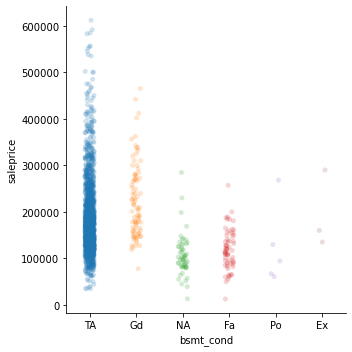

In [158]:
#plot
sns.catplot(x = 'bsmt_cond', y='saleprice', data = train, alpha=0.2)

In [159]:
# dummy to TA or above
train.bsmt_cond = train.bsmt_cond.map(lambda x: x == 'TA' or x == 'Gd' or x=='Ex').astype(int)
test.bsmt_cond = test.bsmt_cond.map(lambda x: x == 'TA' or x == 'Gd' or x=='Ex').astype(int)

train.rename(columns = {'bsmt_cond': 'bsmt_cond_is_TA_Gd_Ex'}, inplace=True)
test.rename(columns = {'bsmt_cond': 'bsmt_cond_is_TA_Gd_Ex'}, inplace=True)

train.head().iloc[:,13:23]

,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air
pid,,,,,,,,,,
533352170,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y
531379050,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y
535304180,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y
916386060,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y
906425045,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y


In [160]:
# bsmt_exposure
train[train.bsmt_exposure.isnull()].has_basement.value_counts()

0    55
1     3
Name: has_basement, dtype: int64

In [161]:
train.bsmt_exposure.map(lambda x: 0 if pd.isnull(x) else x).value_counts(normalize=True)

No    0.654128
Av    0.140694
Gd    0.097215
Mn    0.079629
0     0.028334
Name: bsmt_exposure, dtype: float64

In [162]:
train[train.bsmt_exposure.isnull()].has_basement.value_counts()

0    55
1     3
Name: has_basement, dtype: int64

In [163]:
test[test.bsmt_exposure.isnull()].has_basement.value_counts()

0    25
Name: has_basement, dtype: int64

In [164]:
# investigate 3 nulls with basement
train[(train.bsmt_exposure.isnull())&(train.has_basement==1)].iloc[:,13:23]

,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air
pid,,,,,,,,,,
528458090,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y
528445060,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y
907194130,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y


In [165]:
# see most common exposure for unf basements
train[train.bsmtfin_type_1 == 'Unf'].bsmt_exposure.value_counts()

No    478
Av     62
Mn     41
Gd     19
Name: bsmt_exposure, dtype: int64

In [166]:
# impute 3 nulls with basement to 'No'
train.bsmt_exposure = train.apply(lambda row: 'No' if pd.isnull(row.bsmt_exposure) and row.bsmtfin_type_1 == 'Unf'\
                                  else row.bsmt_exposure,
                                  axis = 1)

In [167]:
# impute remaining nulls to 'NA'
train.bsmt_exposure = train.bsmt_exposure.map(lambda x: 'NA' if pd.isnull(x) else x)
test.bsmt_exposure = test.bsmt_exposure.map(lambda x: 'NA' if pd.isnull(x) else x)

In [168]:
train.bsmt_exposure.value_counts(normalize=True)

No    0.655594
Av    0.140694
Gd    0.097215
Mn    0.079629
NA    0.026869
Name: bsmt_exposure, dtype: float64

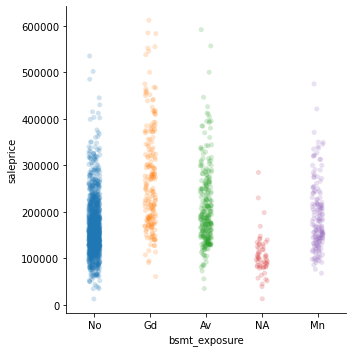

In [169]:
# plot it
sns.catplot(x = 'bsmt_exposure', y = 'saleprice', data = train, alpha = 0.2);

In [170]:
# dummy to has_exposure
train.bsmt_exposure = train.bsmt_exposure.map(lambda x: x == 'Gd' or x=='Mn' or x=='Av').astype(int)
test.bsmt_exposure = test.bsmt_exposure.map(lambda x: x == 'Gd' or x=='Mn' or x=='Av').astype(int)

train.rename(columns = {'bsmt_exposure': 'has_bsmt_exposure'}, inplace=True)
test.rename(columns = {'bsmt_exposure': 'has_bsmt_exposure'}, inplace=True)

In [171]:
# review bsmtfin_type_1
train.bsmtfin_type_1.unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', nan, 'BLQ', 'LwQ'], dtype=object)

In [172]:
# confirm nulls don't have basements
train[train.bsmtfin_type_1.isnull()].has_basement.value_counts()

0    55
Name: has_basement, dtype: int64

In [173]:
test[test.bsmtfin_type_1.isnull()].has_basement.value_counts()

0    25
Name: has_basement, dtype: int64

In [174]:
# impute to 'NA'
train.bsmtfin_type_1 = train.bsmtfin_type_1.map(lambda x: 'NA' if pd.isnull(x) else x)
test.bsmtfin_type_1 = test.bsmtfin_type_1.map(lambda x: 'NA' if pd.isnull(x) else x)

In [175]:
train.bsmtfin_type_1.value_counts(normalize=True)

GLQ    0.298974
Unf    0.294577
ALQ    0.143136
BLQ    0.097704
Rec    0.088911
LwQ    0.049829
NA     0.026869
Name: bsmtfin_type_1, dtype: float64

In [176]:
# review bsmtfin_type_2
train.bsmtfin_type_2.unique()

array(['Unf', 'Rec', nan, 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)

In [177]:
# confirm nulls don't have basements
train[train.bsmtfin_type_2.isnull()].has_basement.value_counts()

0    55
1     1
Name: has_basement, dtype: int64

In [178]:
test[test.bsmtfin_type_2.isnull()].has_basement.value_counts()

0    25
Name: has_basement, dtype: int64

In [179]:
# investigate null with basement
train[(train.bsmtfin_type_2.isnull())&(train.has_basement == 1)].iloc[:,13:23]

,has_bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air
pid,,,,,,,,,,
528142130,0,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y


In [180]:
# see most common bsmtfin_type_2 for GLQ basements
train[train.bsmtfin_type_1 == 'GLQ'].bsmtfin_type_2.value_counts()

Unf    566
Rec     17
ALQ     11
LwQ     11
BLQ      6
Name: bsmtfin_type_2, dtype: int64

In [181]:
# impute as 'Rec' since unfinished sf + sf_1 leaves 479 left
train.loc[528142130, 'bsmtfin_type_2'] = 'Rec'
train.loc[528142130, 'bsmtfin_type_2']

'Rec'

In [182]:
# impute the others as 'NA'
temp = train.loc[528142130,'bsmtfin_type_2']

train.bsmtfin_type_2 = train.bsmtfin_type_2.map(lambda x: 'NA' if pd.isnull(x) else x)
test.bsmtfin_type_2 = test.bsmtfin_type_2.map(lambda x: 'NA' if pd.isnull(x) else x)

train.loc[528142130,'bsmtfin_type_2'] = temp

In [183]:
# confirm nulls gone
train.bsmtfin_type_2.isnull().sum()

0

In [184]:
test.bsmtfin_type_2.isnull().sum()

0

In [185]:
# get absolute membership

bsmtfins = pd.DataFrame(train.bsmtfin_type_1+ ';' + train.bsmtfin_type_2,
                        columns = ['bsmtfins'])
test_bsmtfins = pd.DataFrame(test.bsmtfin_type_1+ ';' + test.bsmtfin_type_2,
                            columns = ['bsmtfins'])


bsmtfins.bsmtfins.value_counts()

Unf;Unf    603
GLQ;Unf    566
ALQ;Unf    226
Rec;Unf    143
BLQ;Unf    143
LwQ;Unf     64
NA;NA       55
BLQ;Rec     28
ALQ;Rec     25
ALQ;BLQ     23
GLQ;Rec     18
BLQ;LwQ     18
ALQ;LwQ     16
Rec;LwQ     15
GLQ;ALQ     11
LwQ;ALQ     11
GLQ;LwQ     11
LwQ;Rec     10
Rec;ALQ     10
Rec;BLQ     10
LwQ;GLQ      9
LwQ;BLQ      8
BLQ;GLQ      7
GLQ;BLQ      6
Rec;GLQ      4
BLQ;ALQ      3
ALQ;GLQ      3
BLQ;BLQ      1
Name: bsmtfins, dtype: int64

In [186]:
bsmtfins.bsmtfins.str.get_dummies(';').mean().sort_values()

NA     0.026869
LwQ    0.079140
BLQ    0.120664
Rec    0.128481
ALQ    0.160234
GLQ    0.310210
Unf    0.852467
dtype: float64

In [187]:
pd.Series(train.total_bsmt_sf == (train.bsmt_unf_sf + train.bsmtfin_sf_2 + train.bsmtfin_sf_1)).value_counts()

True     2046
False       1
dtype: int64

In [188]:
pd.Series(test.total_bsmt_sf == (test.bsmt_unf_sf + test.bsmtfin_sf_2 + test.bsmtfin_sf_1)).value_counts()

True    878
dtype: int64

In [189]:
# identify and investigate the one mismatch
train[train.total_bsmt_sf != (train.bsmt_unf_sf + train.bsmtfin_sf_2 + train.bsmtfin_sf_1)].iloc[:,13:23]

,has_bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air
pid,,,,,,,,,,
903230120,0,NA,NaN,NA,NaN,NaN,NaN,GasA,TA,Y


In [190]:
# impute with zeros
train.loc[903230120,['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf']] = [0,0,0,0]
train.loc[903230120,['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf']]

bsmtfin_sf_1     0.0
bsmtfin_sf_2     0.0
bsmt_unf_sf      0.0
total_bsmt_sf    0.0
Name: 903230120, dtype: object

In [191]:
pd.Series(train.total_bsmt_sf == (train.bsmt_unf_sf + train.bsmtfin_sf_2 + train.bsmtfin_sf_1)).value_counts()

True    2047
dtype: int64

**Observation**
  *  Create columns for each type of finished bsmt and its associated SF
    *  BSMT_GLQ_SF
    *  BSMT_ALQ_SF
    *  etc.

In [192]:
train['bsmt_GLQ_sf'] = train.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'GLQ'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'GLQ'\
                                    else 0, axis = 1)

test['bsmt_GLQ_sf'] = test.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'GLQ'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'GLQ'\
                                    else 0, axis = 1)

In [193]:
train['bsmt_ALQ_sf'] = train.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'ALQ'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'ALQ'\
                                    else 0, axis = 1)

test['bsmt_ALQ_sf'] = test.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'ALQ'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'ALQ'\
                                    else 0, axis = 1)

In [194]:
train['bsmt_BLQ_sf'] = train.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'BLQ'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'BLQ'\
                                    else 0, axis = 1)

test['bsmt_BLQ_sf'] = test.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'BLQ'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'BLQ'\
                                    else 0, axis = 1)

In [195]:
train['bsmt_LwQ_sf'] = train.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'LwQ'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'LwQ'\
                                    else 0, axis = 1)

test['bsmt_LwQ_sf'] = test.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'LwQ'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'LwQ'\
                                    else 0, axis = 1)

In [196]:
train['bsmt_Rec_sf'] = train.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'Rec'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'Rec'\
                                    else 0, axis = 1)

test['bsmt_Rec_sf'] = test.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'Rec'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'Rec'\
                                    else 0, axis = 1)

In [197]:
pd.Series(train.total_bsmt_sf ==\
train['bsmt_GLQ_sf']+train['bsmt_ALQ_sf']+train['bsmt_Rec_sf']+train['bsmt_LwQ_sf']+train['bsmt_BLQ_sf']+train.bsmt_unf_sf)\
.value_counts()

True     2045
False       2
dtype: int64

In [198]:
pd.Series(test.total_bsmt_sf ==\
test['bsmt_GLQ_sf']+test['bsmt_ALQ_sf']+test['bsmt_Rec_sf']+test['bsmt_LwQ_sf']+test['bsmt_BLQ_sf']+test.bsmt_unf_sf)\
.value_counts()

True    878
dtype: int64

In [199]:
train[train.total_bsmt_sf !=\
      train['bsmt_GLQ_sf']+train['bsmt_ALQ_sf']+train['bsmt_Rec_sf']+train['bsmt_LwQ_sf']\
      +train['bsmt_BLQ_sf']+train.bsmt_unf_sf].loc[:,['bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',\
                                                      'bsmt_unf_sf','total_bsmt_sf']]



,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf
pid,,,,,,
531451110,BLQ,543.0,BLQ,119.0,261.0,923.0
527455030,GLQ,632.0,Unf,6.0,423.0,1061.0


In [200]:
# adjust pid 531451110
train.loc[531451110,'bsmt_BLQ_sf'] = 662

# adjust pid 527455030
train.loc[527455030,'bsmt_unf_sf'] = 429

In [201]:
# recheck
train[train.total_bsmt_sf !=\
      train['bsmt_GLQ_sf']+train['bsmt_ALQ_sf']+train['bsmt_Rec_sf']+train['bsmt_LwQ_sf']\
      +train['bsmt_BLQ_sf']+train.bsmt_unf_sf].loc[:,['bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',\
                                                      'bsmt_unf_sf','total_bsmt_sf']]



,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf
pid,,,,,,


In [202]:
train.head().iloc[:,-7:]

,foundation_PConc,foundation_CBlock,bsmt_GLQ_sf,bsmt_ALQ_sf,bsmt_BLQ_sf,bsmt_LwQ_sf,bsmt_Rec_sf
pid,,,,,,,
533352170,0,1,533.0,0.0,0.0,0.0,0.0
531379050,1,0,637.0,0.0,0.0,0.0,0.0
535304180,0,1,731.0,0.0,0.0,0.0,0.0
916386060,1,0,0.0,0.0,0.0,0.0,0.0
906425045,1,0,0.0,0.0,0.0,0.0,0.0


In [203]:
# drop bsmt rows
train.drop(['bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2', 'bsmtfin_sf_2'],
          axis = 1,
          inplace = True)

test.drop(['bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2', 'bsmtfin_sf_2'],
          axis = 1,
          inplace = True)


train.head().iloc[:,13:23]

,has_bsmt_exposure,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf
pid,,,,,,,,,,
533352170,0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0
531379050,0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0
535304180,0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0
916386060,0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0
906425045,0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0


In [204]:
# review heating
train.heating.unique()

train.heating.value_counts(normalize=True)

GasA    0.983879
GasW    0.009770
Wall    0.002931
Grav    0.002443
OthW    0.000977
Name: heating, dtype: float64

In [205]:
# drop it
train.drop('heating', axis = 1, inplace = True)
test.drop('heating', axis = 1, inplace = True)

train.head().iloc[:,13:23]

,has_bsmt_exposure,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area
pid,,,,,,,,,,
533352170,0,192.0,725.0,Ex,Y,SBrkr,725,754,0,1479
531379050,0,276.0,913.0,Ex,Y,SBrkr,913,1209,0,2122
535304180,0,326.0,1057.0,TA,Y,SBrkr,1057,0,0,1057
916386060,0,384.0,384.0,Gd,Y,SBrkr,744,700,0,1444
906425045,0,676.0,676.0,TA,Y,SBrkr,831,614,0,1445


In [206]:
# review heating_qc
train.heating_qc.unique()

train.heating_qc.value_counts(normalize=True)

Ex    0.519297
TA    0.291158
Gd    0.155349
Fa    0.032731
Po    0.001466
Name: heating_qc, dtype: float64

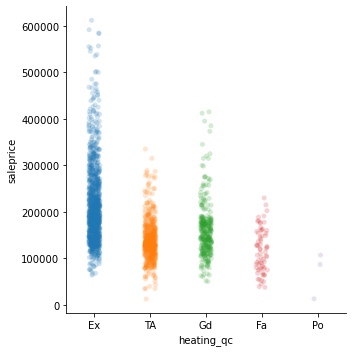

In [207]:
# plot it
sns.catplot(x = 'heating_qc', y = 'saleprice', data=train, alpha = 0.2);

In [208]:
# make is heating_qc_Ex
train.heating_qc = train.heating_qc.map(lambda x: x == 'Ex').astype(int)
test.heating_qc = test.heating_qc.map(lambda x: x == 'Ex').astype(int)

train.rename(columns = {'heating_qc': 'is_heating_qc_Ex'}, inplace=True)
test.rename(columns = {'heating_qc': 'is_heating_qc_Ex'}, inplace=True)

train.head().iloc[:,13:23]

,has_bsmt_exposure,bsmt_unf_sf,total_bsmt_sf,is_heating_qc_Ex,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area
pid,,,,,,,,,,
533352170,0,192.0,725.0,1,Y,SBrkr,725,754,0,1479
531379050,0,276.0,913.0,1,Y,SBrkr,913,1209,0,2122
535304180,0,326.0,1057.0,0,Y,SBrkr,1057,0,0,1057
916386060,0,384.0,384.0,0,Y,SBrkr,744,700,0,1444
906425045,0,676.0,676.0,0,Y,SBrkr,831,614,0,1445


In [209]:
test.shape, train.shape

((878, 88), (2047, 89))

In [210]:
test.isnull().sum()[10:17]

exter_cond_Ex_Gd         0
bsmt_qual_Ex_Gd          0
bsmt_cond_is_TA_Gd_Ex    0
has_bsmt_exposure        0
bsmt_unf_sf              0
total_bsmt_sf            0
is_heating_qc_Ex         0
dtype: int64

## Cols [17:28] . fin [18:27]

In [211]:
train.columns[17:28]

Index(['central_air', 'electrical', '1st_flr_sf', '2nd_flr_sf',
       'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath',
       'full_bath', 'half_bath', 'bedroom_abvgr'],
      dtype='object')

In [212]:
train.dtypes[17:28]

central_air         object
electrical          object
1st_flr_sf           int64
2nd_flr_sf           int64
low_qual_fin_sf      int64
gr_liv_area          int64
bsmt_full_bath     float64
bsmt_half_bath     float64
full_bath            int64
half_bath            int64
bedroom_abvgr        int64
dtype: object

In [213]:
train.isnull().sum()[17:28]

central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     2
bsmt_half_bath     2
full_bath          0
half_bath          0
bedroom_abvgr      0
dtype: int64

In [214]:
test.isnull().sum()[17:28]

central_air        0
electrical         1
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath          0
half_bath          0
bedroom_abvgr      0
dtype: int64

In [215]:
# investigate test electrical
test.electrical.unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', nan], dtype=object)

In [216]:
# see most common in train
train.electrical.value_counts()

SBrkr    1864
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

In [217]:
#impute with SBrkr
test.loc[916386080,'electrical'] = 'SBrkr'
test.loc[916386080,'electrical']

'SBrkr'

In [218]:
# investigate bsmt_full_bath
train[train.bsmt_full_bath.isnull()].has_basement

pid
908154080    0
903230120    0
Name: has_basement, dtype: int32

In [219]:
# impute with 0
train.bsmt_full_bath = train.bsmt_full_bath.map(lambda x: 0 if pd.isnull(x) else x)

In [220]:
# investigate bsmt_full_bath
train[train.bsmt_half_bath.isnull()].has_basement

pid
908154080    0
903230120    0
Name: has_basement, dtype: int32

In [221]:
# impute with 0
train.bsmt_half_bath = train.bsmt_half_bath.map(lambda x: 0 if pd.isnull(x) else x)

In [222]:
train.isnull().sum()[18:28]

electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath          0
half_bath          0
bedroom_abvgr      0
dtype: int64

In [223]:
# review central_air
train.central_air.unique()


array(['Y', 'N'], dtype=object)

In [224]:
# dummy
train.central_air = train.central_air.map(lambda x: x == 'Y').astype(int)
test.central_air = test.central_air.map(lambda x: x == 'Y').astype(int)

train.rename(columns = {'central_air':'has_central_air'}, inplace=True)
test.rename(columns = {'central_air':'has_central_air'}, inplace=True)

train.head().iloc[:,18:28]

,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr
pid,,,,,,,,,,
533352170,SBrkr,725,754,0,1479,0.0,0.0,2,1,3
531379050,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4
535304180,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3
916386060,SBrkr,744,700,0,1444,0.0,0.0,2,1,3
906425045,SBrkr,831,614,0,1445,0.0,0.0,2,0,3


In [225]:
# review electrical
train.electrical.unique()

train.electrical.value_counts(normalize=True)

SBrkr    0.910601
FuseA    0.068393
FuseF    0.017098
FuseP    0.003420
Mix      0.000489
Name: electrical, dtype: float64

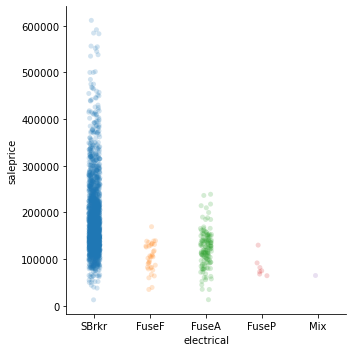

In [226]:
# plot
sns.catplot(x='electrical', y='saleprice', data=train, alpha=0.2);

In [227]:
# dummy to is_SBrkr
train.electrical = train.electrical.map(lambda x: x == 'SBrkr').astype(int)
test.electrical = test.electrical.map(lambda x: x == 'SBrkr').astype(int)

train.rename(columns = {'electrical':'electrical_is_SBrkr'}, inplace=True)
test.rename(columns = {'electrical':'electrical_is_SBrkr'}, inplace=True)

train.head().iloc[:,18:28]

,electrical_is_SBrkr,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr
pid,,,,,,,,,,
533352170,1,725,754,0,1479,0.0,0.0,2,1,3
531379050,1,913,1209,0,2122,1.0,0.0,2,1,4
535304180,1,1057,0,0,1057,1.0,0.0,1,0,3
916386060,1,744,700,0,1444,0.0,0.0,2,1,3
906425045,1,831,614,0,1445,0.0,0.0,2,0,3


In [228]:
# review 1st_flr_sf
train['1st_flr_sf'].describe()

count    2047.000000
mean     1161.864191
std       388.250063
min       334.000000
25%       879.000000
50%      1092.000000
75%      1402.500000
max      5095.000000
Name: 1st_flr_sf, dtype: float64

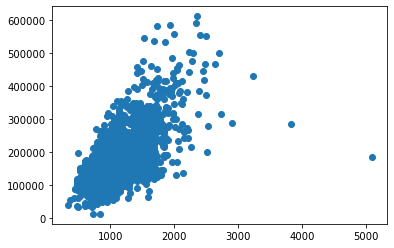

In [229]:
# plot it
plt.scatter(train['1st_flr_sf'], train.saleprice)

In [230]:
# drop two outliers
train = train[train['1st_flr_sf']<=3500]

In [231]:
# review 2nd_flr_sf
train['2nd_flr_sf'].describe()

count    2045.000000
mean      329.488509
std       425.746127
min         0.000000
25%         0.000000
50%         0.000000
75%       691.000000
max      1862.000000
Name: 2nd_flr_sf, dtype: float64

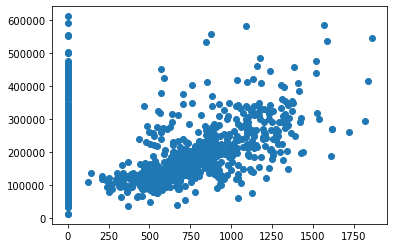

In [232]:
# plot it
plt.scatter(train['2nd_flr_sf'], train.saleprice)

In [233]:
train['2nd_flr_sf'].value_counts(normalize=True)

0      0.580440
728    0.007335
504    0.006846
546    0.005868
600    0.004890
         ...   
581    0.000489
220    0.000489
679    0.000489
841    0.000489
776    0.000489
Name: 2nd_flr_sf, Length: 503, dtype: float64

In [234]:
# create dummy for has 2nd_flr_sf
has_2nd_flr = train['2nd_flr_sf'].map(lambda x: x>0).astype(int)
test_has_2nd_flr = test['2nd_flr_sf'].map(lambda x: x>0).astype(int)

train = train.join(has_2nd_flr.rename('has_2nd_flr'))
test = test.join(test_has_2nd_flr.rename('has_2nd_flr'))

train.head().iloc[:,-5:]

,bsmt_ALQ_sf,bsmt_BLQ_sf,bsmt_LwQ_sf,bsmt_Rec_sf,has_2nd_flr
pid,,,,,
533352170,0.0,0.0,0.0,0.0,1
531379050,0.0,0.0,0.0,0.0,1
535304180,0.0,0.0,0.0,0.0,0
916386060,0.0,0.0,0.0,0.0,1
906425045,0.0,0.0,0.0,0.0,1


In [235]:
# review low_qual_fin_sf
train.low_qual_fin_sf.describe()

train.low_qual_fin_sf.value_counts(normalize=True)

0       0.983863
80      0.001467
205     0.000978
512     0.000489
362     0.000489
53      0.000489
360     0.000489
384     0.000489
156     0.000489
436     0.000489
259     0.000489
479     0.000489
140     0.000489
397     0.000489
514     0.000489
144     0.000489
697     0.000489
114     0.000489
390     0.000489
234     0.000489
572     0.000489
312     0.000489
120     0.000489
515     0.000489
1064    0.000489
108     0.000489
473     0.000489
371     0.000489
513     0.000489
528     0.000489
450     0.000489
Name: low_qual_fin_sf, dtype: float64

In [236]:
#  drop it
train.drop('low_qual_fin_sf', axis = 1, inplace=True)
test.drop('low_qual_fin_sf', axis = 1, inplace=True)

train.head().iloc[:,18:28]

,electrical_is_SBrkr,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr
pid,,,,,,,,,,
533352170,1,725,754,1479,0.0,0.0,2,1,3,1
531379050,1,913,1209,2122,1.0,0.0,2,1,4,1
535304180,1,1057,0,1057,1.0,0.0,1,0,3,1
916386060,1,744,700,1444,0.0,0.0,2,1,3,1
906425045,1,831,614,1445,0.0,0.0,2,0,3,1


In [237]:
# review gr_liv_area
train.gr_liv_area.describe()

count    2045.000000
mean     1493.658680
std       483.095392
min       334.000000
25%      1128.000000
50%      1442.000000
75%      1728.000000
max      3672.000000
Name: gr_liv_area, dtype: float64

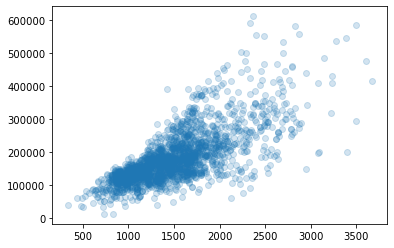

In [238]:
# plot
plt.scatter(train.gr_liv_area, train.saleprice, alpha=0.2);

**Observation**
  *  Love it!

In [239]:
# review train.bsmt_full_bath
train.bsmt_full_bath.unique()

train.bsmt_full_bath.value_counts(normalize = True)

0.0    0.586797
1.0    0.401467
2.0    0.010758
3.0    0.000978
Name: bsmt_full_bath, dtype: float64

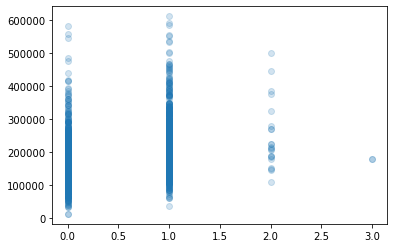

In [240]:
# plot
plt.scatter(train.bsmt_full_bath, train.saleprice, alpha=0.2);

In [241]:
# review train.bsmt_half_bath
train.bsmt_half_bath.unique()

train.bsmt_half_bath.value_counts(normalize = True)

0.0    0.939364
1.0    0.058680
2.0    0.001956
Name: bsmt_half_bath, dtype: float64

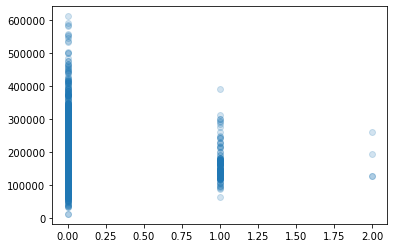

In [242]:
# plot
plt.scatter(train.bsmt_half_bath, train.saleprice, alpha=0.2);

In [243]:
# review full_bath
train.full_bath.unique()

train.full_bath.value_counts()

2    1091
1     900
3      44
0       8
4       2
Name: full_bath, dtype: int64

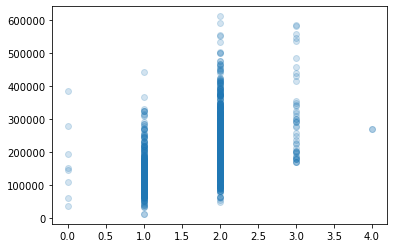

In [244]:
# plot
plt.scatter(train.full_bath, train.saleprice, alpha=0.2);

In [245]:
# review full_bath
train.half_bath.unique()

train.half_bath.value_counts()

0    1305
1     722
2      18
Name: half_bath, dtype: int64

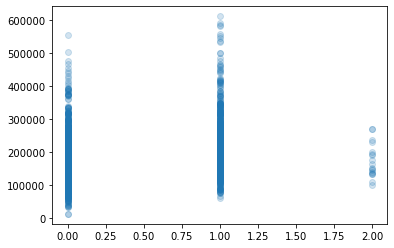

In [246]:
# plot
plt.scatter(train.half_bath, train.saleprice, alpha=0.2);

In [247]:
# create total full baths
train['total_full_baths'] = train.bsmt_full_bath + train.full_bath
test['total_full_baths'] = test.bsmt_full_bath + test.full_bath

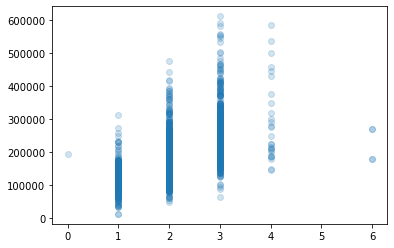

In [248]:
# plot
plt.scatter(train.total_full_baths, train.saleprice, alpha=0.2);

In [249]:
# create total half baths
train['total_half_baths'] = train.bsmt_half_bath + train.half_bath
test['total_half_baths'] = test.bsmt_half_bath + test.half_bath

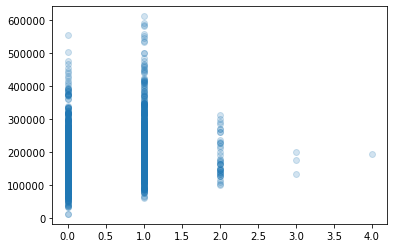

In [250]:
# plot
plt.scatter(train.total_half_baths, train.saleprice, alpha=0.2);

In [251]:
# total baths?
train['total_baths'] = train.total_full_baths + train.total_half_baths
test['total_baths'] = test.total_full_baths + test.total_half_baths

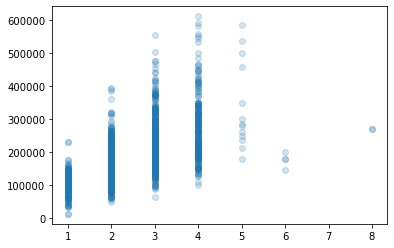

In [252]:
# plot
plt.scatter(train.total_baths, train.saleprice, alpha=0.2);

In [253]:
train.total_baths.describe()

count    2045.000000
mean        2.434719
std         0.938556
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: total_baths, dtype: float64

In [254]:
train.shape, test.shape

((2045, 92), (878, 91))

In [255]:
test.isnull().sum()[15:28]

total_bsmt_sf          0
is_heating_qc_Ex       0
has_central_air        0
electrical_is_SBrkr    0
1st_flr_sf             0
2nd_flr_sf             0
gr_liv_area            0
bsmt_full_bath         0
bsmt_half_bath         0
full_bath              0
half_bath              0
bedroom_abvgr          0
kitchen_abvgr          0
dtype: int64

## Cols [26:37] . finished [27:34]

In [256]:
train.columns[26:37]

Index(['bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd',
       'functional', 'fireplaces', 'fireplace_qu', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars'],
      dtype='object')

In [257]:
train.dtypes[26:37]

bedroom_abvgr      int64
kitchen_abvgr      int64
kitchen_qual      object
totrms_abvgrd      int64
functional        object
fireplaces         int64
fireplace_qu      object
garage_type       object
garage_yr_blt    float64
garage_finish     object
garage_cars      float64
dtype: object

In [258]:
# check nulls
train.isnull().sum()[26:37]

bedroom_abvgr       0
kitchen_abvgr       0
kitchen_qual        0
totrms_abvgrd       0
functional          0
fireplaces          0
fireplace_qu     1000
garage_type       113
garage_yr_blt     114
garage_finish     114
garage_cars         1
dtype: int64

In [259]:
test.isnull().sum()[26:37]

bedroom_abvgr      0
kitchen_abvgr      0
kitchen_qual       0
totrms_abvgrd      0
functional         0
fireplaces         0
fireplace_qu     422
garage_type       44
garage_yr_blt     45
garage_finish     45
garage_cars        0
dtype: int64

In [260]:
# investigate fireplace_qu
train.fireplace_qu.unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [261]:
train[train.fireplace_qu.isnull()].fireplaces.unique()

array([0], dtype=int64)

In [262]:
# impute with 'NA'
train.fireplace_qu = train.fireplace_qu.map(lambda x: 'NA' if pd.isnull(x) else x)
test.fireplace_qu = test.fireplace_qu.map(lambda x: 'NA' if pd.isnull(x) else x)

In [263]:
# investigate garage_type
train.garage_type.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [264]:
train[train.garage_type.isnull()].garage_yr_blt.unique()

array([nan])

In [265]:
# impute with 'NA'
train.garage_type = train.garage_type.map(lambda x: 'NA' if pd.isnull(x) else x)
test.garage_type = test.garage_type.map(lambda x: 'NA' if pd.isnull(x) else x)

In [266]:
# investigate garage_yr_blt
train.garage_yr_blt.unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

In [267]:
train[(train.garage_yr_blt.isnull())&(train.garage_type != 'NA')].garage_type

pid
910201180    Detchd
Name: garage_type, dtype: object

In [268]:
# look at house built vs garage built
# create garage age
garage_age = train.garage_yr_blt.map(lambda x: 2010 - x if ~pd.isnull(x) else x)
test_garage_age = test.garage_yr_blt.map(lambda x: 2010 - x if ~pd.isnull(x) else x)

garage_age.rename('garage_age', inplace=True)
test_garage_age.rename('garage_age', inplace=True)

train = train.join(garage_age)
test = test.join(test_garage_age)

In [269]:
# compare hosue age to garage age
pd.Series(train.home_age - train.garage_age).describe()

count    1931.000000
mean        5.309684
std        16.579074
min       -15.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       201.000000
dtype: float64

In [270]:
train.garage_yr_blt.describe()

count    1931.000000
mean     1978.712066
std        25.450673
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: garage_yr_blt, dtype: float64

In [271]:
# make year 2207 null
train.loc[916384070,'garage_yr_blt'] = np.nan


In [272]:
train.garage_yr_blt.describe()

count    1930.000000
mean     1978.593782
std        24.920709
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: garage_yr_blt, dtype: float64

In [273]:
# retry comparison garage_age
pd.Series(train.home_age - train.garage_age).describe()

count    1931.000000
mean        5.309684
std        16.579074
min       -15.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       201.000000
dtype: float64

In [274]:
# review nulls again
train[(train.garage_yr_blt.isnull())&(train.garage_type != 'NA')].garage_type

pid
916384070    Attchd
910201180    Detchd
Name: garage_type, dtype: object

In [275]:
# imput with garage date 5 years beyond yr house built
train.loc[916384070,'garage_yr_blt'] = 2010
train.loc[910201180,'garage_yr_blt'] = 1928
train.loc[[916384070,910201180], 'garage_yr_blt']

pid
916384070    2010.0
910201180    1928.0
Name: garage_yr_blt, dtype: float64

In [276]:

test[(test.garage_yr_blt.isnull())&(test.garage_type != 'NA')].garage_type

pid
903426160    Detchd
Name: garage_type, dtype: object

In [277]:
# impute with 5 years
test.loc[903426160,'garage_yr_blt'] = 1915
test.loc[903426160,'garage_yr_blt']


1915.0

In [278]:
# review garage_fin
train.garage_finish.unique()

train[train.garage_finish.isnull()].garage_yr_blt.value_counts()

1928.0    1
Name: garage_yr_blt, dtype: int64

In [279]:
test[test.garage_finish.isnull()].garage_yr_blt.value_counts()

1915.0    1
Name: garage_yr_blt, dtype: int64

In [280]:
# impute by most common
train.garage_finish.value_counts()

Unf    847
RFn    578
Fin    506
Name: garage_finish, dtype: int64

In [281]:
train.loc[910201180,'garage_finish'] = 'Unf'
train[train.garage_finish.isnull()].garage_yr_blt.value_counts()

Series([], Name: garage_yr_blt, dtype: int64)

In [282]:
test[(test.garage_finish.isnull())&(test.garage_yr_blt == 1915)]

,lot_frontage,lot_area,has_alley,is_lot_shape_regluar,is_land_contour_lvl,land_slope_is_Gtl,overall_qual,overall_cond,mas_vnr_area,exter_qual_Ex_Gd,...,bsmt_GLQ_sf,bsmt_ALQ_sf,bsmt_BLQ_sf,bsmt_LwQ_sf,bsmt_Rec_sf,has_2nd_flr,total_full_baths,total_half_baths,total_baths,garage_age
pid,,,,,,,,,,,,,,,,,,,,,
903426160,57.0,8094,1,1,1,1,6,8,0.0,0,...,0,0,0,0,196,1,2,0,2,NaN


In [283]:
test.loc[903426160,'garage_finish'] = 'Unf'
test[test.garage_finish.isnull()].garage_yr_blt.value_counts()

Series([], Name: garage_yr_blt, dtype: int64)

In [284]:
train.isnull().sum()[27:37]

kitchen_abvgr      0
kitchen_qual       0
totrms_abvgrd      0
functional         0
fireplaces         0
fireplace_qu       0
garage_type        0
garage_yr_blt    113
garage_finish    113
garage_cars        1
dtype: int64

In [285]:
test.isnull().sum()[27:37]

kitchen_abvgr     0
kitchen_qual      0
totrms_abvgrd     0
functional        0
fireplaces        0
fireplace_qu      0
garage_type       0
garage_yr_blt    44
garage_finish    44
garage_cars       0
dtype: int64

In [286]:
# finalize imputation with garage_finish NA, keep garage yr null
train.garage_finish = train.garage_finish.map(lambda x: 'NA' if pd.isnull(x) else x)
test.garage_finish = test.garage_finish.map(lambda x: 'NA' if pd.isnull(x) else x)

In [287]:
train.isnull().sum()[27:37]

kitchen_abvgr      0
kitchen_qual       0
totrms_abvgrd      0
functional         0
fireplaces         0
fireplace_qu       0
garage_type        0
garage_yr_blt    113
garage_finish      0
garage_cars        1
dtype: int64

In [288]:
test.isnull().sum()[27:37]

kitchen_abvgr     0
kitchen_qual      0
totrms_abvgrd     0
functional        0
fireplaces        0
fireplace_qu      0
garage_type       0
garage_yr_blt    44
garage_finish     0
garage_cars       0
dtype: int64

In [289]:
# review bedroom_abvgr
train.bedroom_abvgr.unique()

train.bedroom_abvgr.value_counts(normalize=True)

3    0.541320
2    0.265037
4    0.128606
1    0.036675
5    0.019560
6    0.005868
0    0.002445
8    0.000489
Name: bedroom_abvgr, dtype: float64

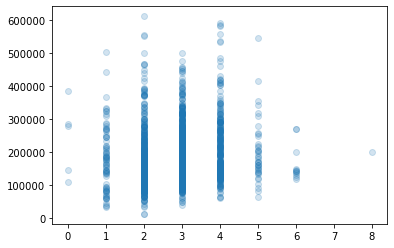

In [290]:
# plot it
plt.scatter(train.bedroom_abvgr, train.saleprice, alpha = 0.2)

In [291]:
# review kitchen_abvgr
train.kitchen_abvgr.unique()

train.kitchen_abvgr.value_counts(normalize=True)

1    0.955501
2    0.043032
0    0.000978
3    0.000489
Name: kitchen_abvgr, dtype: float64

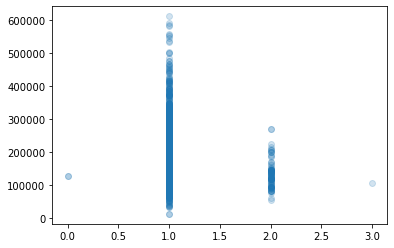

In [292]:
# plot it
plt.scatter(train.kitchen_abvgr, train.saleprice, alpha = 0.2)

In [293]:
# drop column
train.drop('kitchen_abvgr', axis = 1, inplace=True)
test.drop('kitchen_abvgr', axis = 1, inplace=True)

train.head().iloc[:,27:37]

,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area
pid,,,,,,,,,,
533352170,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0
531379050,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0
535304180,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0
916386060,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0
906425045,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0


In [294]:
# review kitchenqual
train.kitchen_qual.unique()

train.kitchen_qual.value_counts(normalize=True)

TA    0.511980
Gd    0.392665
Ex    0.072372
Fa    0.022983
Name: kitchen_qual, dtype: float64

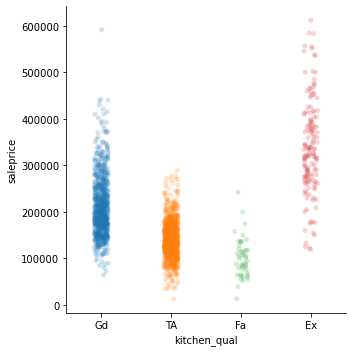

In [295]:
# plot it
sns.catplot(x = 'kitchen_qual', y='saleprice', data=train, alpha = 0.2)

In [296]:
# dummy
train.kitchen_qual = train.kitchen_qual.map(lambda x: x == 'Ex' or x == 'Gd').astype(int)
test.kitchen_qual = test.kitchen_qual.map(lambda x: x == 'Ex' or x == 'Gd').astype(int)

train.rename(columns = {'kitchen_qual': 'kitchen_qual_Ex_Gd'}, inplace=True)
test.rename(columns = {'kitchen_qual': 'kitchen_qual_Ex_Gd'}, inplace=True)

train.head().iloc[:,27:37]

,kitchen_qual_Ex_Gd,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area
pid,,,,,,,,,,
533352170,1,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0
531379050,1,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0
535304180,1,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0
916386060,0,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0
906425045,0,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0


In [297]:
# review totrms_abvgrd
train.totrms_abvgrd.unique()
train.totrms_abvgrd.value_counts(normalize=True)

6     0.291932
7     0.231785
5     0.198533
8     0.111491
4     0.071394
9     0.047433
10    0.023961
11    0.010269
12    0.005868
3     0.005868
14    0.000489
2     0.000489
13    0.000489
Name: totrms_abvgrd, dtype: float64

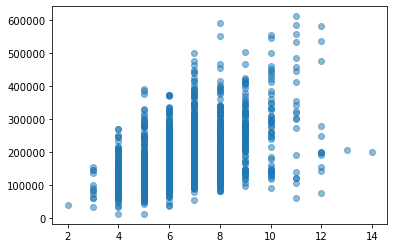

In [298]:
# plot it
plt.scatter(x = train.totrms_abvgrd, y = train.saleprice, alpha = 0.5);

In [299]:
# review functional
train.functional.unique()

train.functional.value_counts(normalize=True)

Typ     0.933496
Min2    0.020538
Min1    0.020538
Mod     0.014181
Maj1    0.005868
Maj2    0.003423
Sev     0.000978
Sal     0.000978
Name: functional, dtype: float64

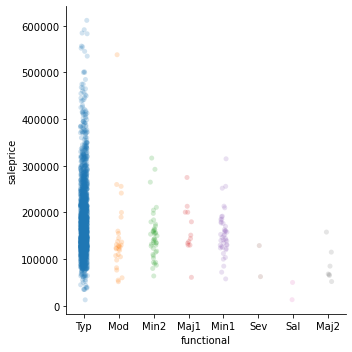

In [300]:
# plot it
sns.catplot(x = 'functional', y='saleprice', data=train, alpha = 0.2)

In [301]:
# dummy for is_typical
train.functional = train.functional.map(lambda x: x == 'Typ').astype(int)
test.functional = test.functional.map(lambda x: x == 'Typ').astype(int)

train.rename(columns = {'functional': 'is_functional'}, inplace = True)
test.rename(columns = {'functional': 'is_functional'}, inplace = True)


train.head().iloc[:,27:37]

,kitchen_qual_Ex_Gd,totrms_abvgrd,is_functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area
pid,,,,,,,,,,
533352170,1,6,1,0,NA,Attchd,1976.0,RFn,2.0,475.0
531379050,1,8,1,1,TA,Attchd,1997.0,RFn,2.0,559.0
535304180,1,5,1,0,NA,Detchd,1953.0,Unf,1.0,246.0
916386060,0,7,1,0,NA,BuiltIn,2007.0,Fin,2.0,400.0
906425045,0,6,1,0,NA,Detchd,1957.0,Unf,2.0,484.0


In [302]:
#review fireplaces
train.fireplaces.unique()

train.fireplaces.value_counts(normalize=True)

0    0.488998
1    0.438631
2    0.069438
3    0.002445
4    0.000489
Name: fireplaces, dtype: float64

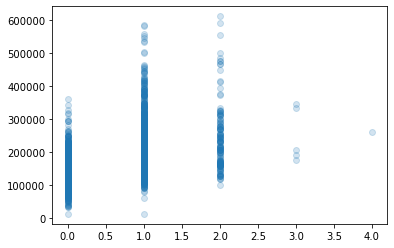

In [303]:
# plot it
plt.scatter(x = train.fireplaces, y=train.saleprice, alpha = 0.2);

In [304]:
# dummy to has fireplace
train.fireplaces = train.fireplaces.map(lambda x: x != 0).astype(int)
test.fireplaces = test.fireplaces.map(lambda x: x != 0).astype(int)


train.rename(columns = {'fireplaces': 'has_fireplace'}, inplace = True)
test.rename(columns = {'fireplaces': 'has_fireplace'}, inplace = True)

train.head().iloc[:,27:37]

,kitchen_qual_Ex_Gd,totrms_abvgrd,is_functional,has_fireplace,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area
pid,,,,,,,,,,
533352170,1,6,1,0,NA,Attchd,1976.0,RFn,2.0,475.0
531379050,1,8,1,1,TA,Attchd,1997.0,RFn,2.0,559.0
535304180,1,5,1,0,NA,Detchd,1953.0,Unf,1.0,246.0
916386060,0,7,1,0,NA,BuiltIn,2007.0,Fin,2.0,400.0
906425045,0,6,1,0,NA,Detchd,1957.0,Unf,2.0,484.0


In [305]:
# review fireplacequ
train.fireplace_qu.unique()

train[train.has_fireplace == 0].fireplace_qu.unique()

train.fireplace_qu.value_counts(normalize=True)

NA    0.488998
Gd    0.253790
TA    0.198044
Fa    0.028851
Po    0.015159
Ex    0.015159
Name: fireplace_qu, dtype: float64

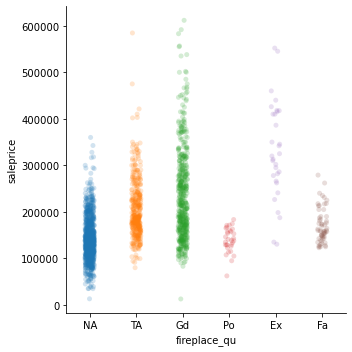

In [306]:
# plot it
sns.catplot(x = 'fireplace_qu', y='saleprice', data=train, alpha = 0.2);

In [307]:
# dummy to fireplace_qu_Ex_Gd
train.fireplace_qu = train.fireplace_qu.map(lambda x: x == 'Ex' or x == 'Gd').astype(int)
test.fireplace_qu = test.fireplace_qu.map(lambda x: x == 'Ex' or x == 'Gd').astype(int)

train.rename(columns = {'fireplace_qu': 'fireplace_qu_Ex_Gd'}, inplace=True)
test.rename(columns = {'fireplace_qu': 'fireplace_qu_Ex_Gd'}, inplace=True)

train.head().iloc[:,27:37]

,kitchen_qual_Ex_Gd,totrms_abvgrd,is_functional,has_fireplace,fireplace_qu_Ex_Gd,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area
pid,,,,,,,,,,
533352170,1,6,1,0,0,Attchd,1976.0,RFn,2.0,475.0
531379050,1,8,1,1,0,Attchd,1997.0,RFn,2.0,559.0
535304180,1,5,1,0,0,Detchd,1953.0,Unf,1.0,246.0
916386060,0,7,1,0,0,BuiltIn,2007.0,Fin,2.0,400.0
906425045,0,6,1,0,0,Detchd,1957.0,Unf,2.0,484.0


In [308]:
# review garage type
train.garage_type.unique()

train.garage_type.value_counts(normalize=True)

Attchd     0.590220
Detchd     0.262103
BuiltIn    0.064548
NA         0.055257
Basment    0.013203
2Types     0.009291
CarPort    0.005379
Name: garage_type, dtype: float64

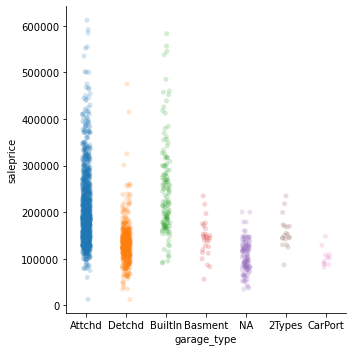

In [309]:
# plot it
sns.catplot(x = 'garage_type', y = 'saleprice', data=train, alpha=0.2);

In [310]:
# create dummy attchd or builtin
train.garage_type = train.garage_type.map(lambda x: x == 'Attchd' or x == 'BuiltIn').astype(int)
test.garage_type = test.garage_type.map(lambda x: x == 'Attchd' or x == 'BuiltIn').astype(int)

train.rename(columns = {'garage_type': 'garage_type_Attchd_BuiltIn'}, inplace=True)
test.rename(columns = {'garage_type': 'garage_type_Attchd_BuiltIn'}, inplace=True)


train.head().iloc[:,27:37]

,kitchen_qual_Ex_Gd,totrms_abvgrd,is_functional,has_fireplace,fireplace_qu_Ex_Gd,garage_type_Attchd_BuiltIn,garage_yr_blt,garage_finish,garage_cars,garage_area
pid,,,,,,,,,,
533352170,1,6,1,0,0,1,1976.0,RFn,2.0,475.0
531379050,1,8,1,1,0,1,1997.0,RFn,2.0,559.0
535304180,1,5,1,0,0,0,1953.0,Unf,1.0,246.0
916386060,0,7,1,0,0,1,2007.0,Fin,2.0,400.0
906425045,0,6,1,0,0,0,1957.0,Unf,2.0,484.0


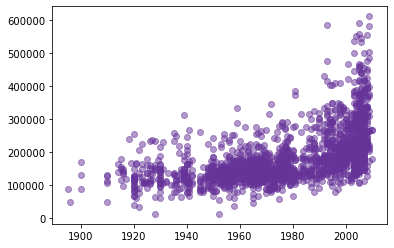

In [311]:
# garage yr built
plt.scatter(x = train.garage_yr_blt, y = train.saleprice, alpha = 0.5, color = 'rebeccapurple');

In [312]:
# split into two groups
train.groupby(pd.cut(train.garage_yr_blt, bins = range(1880, 2011, 5))).mean().saleprice\
              > train.saleprice.describe()['mean']+train.saleprice.describe()['std']

garage_yr_blt
(1880, 1885]    False
(1885, 1890]    False
(1890, 1895]    False
(1895, 1900]    False
(1900, 1905]    False
(1905, 1910]    False
(1910, 1915]    False
(1915, 1920]    False
(1920, 1925]    False
(1925, 1930]    False
(1930, 1935]    False
(1935, 1940]    False
(1940, 1945]    False
(1945, 1950]    False
(1950, 1955]    False
(1955, 1960]    False
(1960, 1965]    False
(1965, 1970]    False
(1970, 1975]    False
(1975, 1980]    False
(1980, 1985]    False
(1985, 1990]    False
(1990, 1995]    False
(1995, 2000]    False
(2000, 2005]    False
(2005, 2010]     True
Name: saleprice, dtype: bool

In [313]:
# bin into garage >= 2006 and has garage
garage_new_2006 = train.garage_yr_blt.map(lambda x: x > 2005).astype(int).rename('garage_new_2006')
has_garage = train.garage_yr_blt.map(lambda x: 0 if pd.isnull(x) else 1).rename('has_garage')

test_garage_new_2006 = test.garage_yr_blt.map(lambda x: x > 2005).astype(int).rename('garage_new_2006')
test_has_garage = test.garage_yr_blt.map(lambda x: 0 if pd.isnull(x) else 1).rename('has_garage')


train = train.join([garage_new_2006,has_garage])
test = test.join([test_garage_new_2006,test_has_garage])

train.head().iloc[:,-5:]

,total_half_baths,total_baths,garage_age,garage_new_2006,has_garage
pid,,,,,
533352170,1.0,3.0,34.0,0,1
531379050,1.0,4.0,13.0,0,1
535304180,0.0,2.0,57.0,0,1
916386060,1.0,3.0,3.0,1,1
906425045,0.0,2.0,53.0,0,1


In [314]:
# drop garage_yr_blt, garage_age
train.drop(['garage_yr_blt','garage_age'], axis = 1, inplace=True)
test.drop(['garage_yr_blt','garage_age'], axis = 1, inplace=True)


train.head().iloc[:,27:37]

,kitchen_qual_Ex_Gd,totrms_abvgrd,is_functional,has_fireplace,fireplace_qu_Ex_Gd,garage_type_Attchd_BuiltIn,garage_finish,garage_cars,garage_area,garage_qual
pid,,,,,,,,,,
533352170,1,6,1,0,0,1,RFn,2.0,475.0,TA
531379050,1,8,1,1,0,1,RFn,2.0,559.0,TA
535304180,1,5,1,0,0,0,Unf,1.0,246.0,TA
916386060,0,7,1,0,0,1,Fin,2.0,400.0,TA
906425045,0,6,1,0,0,0,Unf,2.0,484.0,TA


In [315]:
# review garage_finish
train.garage_finish.unique()
train.garage_finish.value_counts(normalize=True)

Unf    0.414670
RFn    0.282641
Fin    0.247433
NA     0.055257
Name: garage_finish, dtype: float64

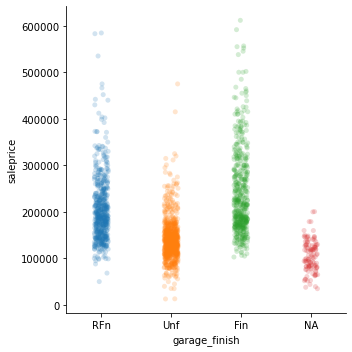

In [316]:
# plot
sns.catplot(x = 'garage_finish', y = 'saleprice', data=train, alpha=0.2);

In [317]:
# dummy it
train = train.join(pd.get_dummies(train.garage_finish, prefix = 'garage_finish')\
                .loc[:,['garage_finish_RFn','garage_finish_Unf','garage_finish_Fin']])
test = test.join(pd.get_dummies(test.garage_finish, prefix = 'garage_finish')\
                .loc[:,['garage_finish_RFn','garage_finish_Unf','garage_finish_Fin']])


train.head().iloc[:,-5:]

,garage_new_2006,has_garage,garage_finish_RFn,garage_finish_Unf,garage_finish_Fin
pid,,,,,
533352170,0,1,1,0,0
531379050,0,1,1,0,0
535304180,0,1,0,1,0
916386060,1,1,0,0,1
906425045,0,1,0,1,0


In [318]:
# drop garage_finish
train.drop('garage_finish', axis=1, inplace=True)
test.drop('garage_finish', axis=1, inplace=True)

train.head().iloc[:,27:37]

,kitchen_qual_Ex_Gd,totrms_abvgrd,is_functional,has_fireplace,fireplace_qu_Ex_Gd,garage_type_Attchd_BuiltIn,garage_cars,garage_area,garage_qual,garage_cond
pid,,,,,,,,,,
533352170,1,6,1,0,0,1,2.0,475.0,TA,TA
531379050,1,8,1,1,0,1,2.0,559.0,TA,TA
535304180,1,5,1,0,0,0,1.0,246.0,TA,TA
916386060,0,7,1,0,0,1,2.0,400.0,TA,TA
906425045,0,6,1,0,0,0,2.0,484.0,TA,TA


In [319]:
test.shape, train.shape

((878, 93), (2045, 94))

In [320]:
test.isnull().sum()[20:35]

2nd_flr_sf                    0
gr_liv_area                   0
bsmt_full_bath                0
bsmt_half_bath                0
full_bath                     0
half_bath                     0
bedroom_abvgr                 0
kitchen_qual_Ex_Gd            0
totrms_abvgrd                 0
is_functional                 0
has_fireplace                 0
fireplace_qu_Ex_Gd            0
garage_type_Attchd_BuiltIn    0
garage_cars                   0
garage_area                   0
dtype: int64

## Col [33:44] . finished [34:39]

In [321]:
train.columns[33:44]

Index(['garage_cars', 'garage_area', 'garage_qual', 'garage_cond',
       'paved_drive', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
       '3ssn_porch', 'screen_porch', 'pool_area'],
      dtype='object')

In [322]:
train.dtypes[33:44]

garage_cars       float64
garage_area       float64
garage_qual        object
garage_cond        object
paved_drive        object
wood_deck_sf        int64
open_porch_sf       int64
enclosed_porch      int64
3ssn_porch          int64
screen_porch        int64
pool_area           int64
dtype: object

In [323]:
train.isnull().sum()[33:44]

garage_cars         1
garage_area         1
garage_qual       114
garage_cond       114
paved_drive         0
wood_deck_sf        0
open_porch_sf       0
enclosed_porch      0
3ssn_porch          0
screen_porch        0
pool_area           0
dtype: int64

In [324]:
test.isnull().sum()[33:44]

garage_cars        0
garage_area        0
garage_qual       45
garage_cond       45
paved_drive        0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
dtype: int64

In [325]:
# review garage_cars
train.garage_cars.unique()
train.garage_cars.map(lambda x: -1 if pd.isnull(x) else x).value_counts(normalize=True)

 2.0    0.553056
 1.0    0.256235
 3.0    0.128117
 0.0    0.055257
 4.0    0.006357
 5.0    0.000489
-1.0    0.000489
Name: garage_cars, dtype: float64

In [326]:
train[train.garage_cars.isnull()].has_garage

pid
910201180    1
Name: has_garage, dtype: int64

In [327]:
# impute with mean
train.loc[910201180,'garage_cars'] = round(train.garage_cars.describe()['mean'],0)

In [328]:
# impute with mean
train.loc[910201180,'garage_area'] = round(train.garage_area.describe()['mean'],0)

In [329]:
train.loc[910201180,['garage_qual','garage_cond']]

garage_qual    NaN
garage_cond    NaN
Name: 910201180, dtype: object

In [330]:
train.loc[910201180,'garage_qual'] = 'TA'
train.loc[910201180,'garage_cond'] = 'TA'

In [331]:
train.isnull().sum()[34:44]

garage_area         0
garage_qual       113
garage_cond       113
paved_drive         0
wood_deck_sf        0
open_porch_sf       0
enclosed_porch      0
3ssn_porch          0
screen_porch        0
pool_area           0
dtype: int64

In [332]:
# review garage_cars
train.garage_cars.unique()
train.garage_cars.value_counts(normalize=True)

2.0    0.553545
1.0    0.256235
3.0    0.128117
0.0    0.055257
4.0    0.006357
5.0    0.000489
Name: garage_cars, dtype: float64

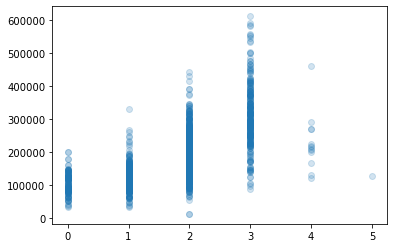

In [333]:
# plot it
plt.scatter(x = train.garage_cars, y=train.saleprice, alpha=0.2);

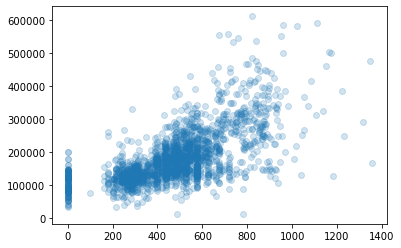

In [334]:
# review garage area
plt.scatter(x = train.garage_area, y=train.saleprice, alpha=0.2);

In [335]:
# review garage_qual
train.garage_qual.unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [336]:
train[train.garage_qual.isnull()].has_garage.value_counts()

0    113
Name: has_garage, dtype: int64

In [337]:
# impute with 'NA'
train.garage_qual = train.garage_qual.map(lambda x: 'NA' if pd.isnull(x) else x)
test.garage_qual = test.garage_qual.map(lambda x: 'NA' if pd.isnull(x) else x)

In [338]:
train.garage_qual.value_counts(normalize=True)

TA    0.893399
NA    0.055257
Fa    0.040098
Gd    0.008802
Ex    0.001467
Po    0.000978
Name: garage_qual, dtype: float64

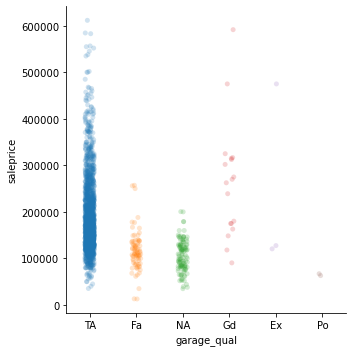

In [339]:
#plot it
sns.catplot(x = 'garage_qual', y='saleprice', data=train, alpha=0.2)

In [340]:
# dummy to isEx,Gd,TA
train.garage_qual = train.garage_qual.map(lambda x: x == 'TA' or x == 'Gd' or x == 'Ex').astype(int)
test.garage_qual = test.garage_qual.map(lambda x: x == 'TA' or x == 'Gd' or x == 'Ex').astype(int)

train.rename(columns = {'garage_qual': 'garage_qual_Ex_Gd_TA'}, inplace = True)
test.rename(columns = {'garage_qual': 'garage_qual_Ex_Gd_TA'}, inplace = True)

train.head().iloc[:,34:44]

,garage_area,garage_qual_Ex_Gd_TA,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area
pid,,,,,,,,,,
533352170,475.0,1,TA,Y,0,44,0,0,0,0
531379050,559.0,1,TA,Y,0,74,0,0,0,0
535304180,246.0,1,TA,Y,0,52,0,0,0,0
916386060,400.0,1,TA,Y,100,0,0,0,0,0
906425045,484.0,1,TA,N,0,59,0,0,0,0


In [341]:
# review garage cond
train.garage_cond.unique()

array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object)

In [342]:
train[train.garage_cond.isnull()].has_garage.value_counts()

0    113
Name: has_garage, dtype: int64

In [343]:
# impute with'NA'
train.garage_cond = train.garage_cond.map(lambda x: 'NA' if pd.isnull(x) else x)
test.garage_cond = test.garage_cond.map(lambda x: 'NA' if pd.isnull(x) else x)

In [344]:
train.garage_cond.value_counts(normalize=True)

TA    0.911002
NA    0.055257
Fa    0.022983
Gd    0.005868
Po    0.003912
Ex    0.000978
Name: garage_cond, dtype: float64

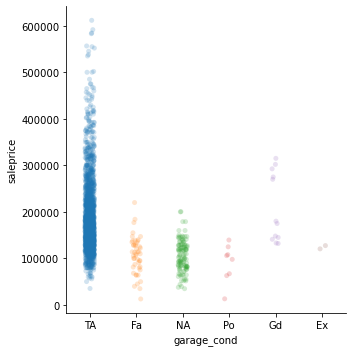

In [345]:
# plot it
sns.catplot(x = 'garage_cond', y='saleprice', data=train, alpha=0.2);

In [346]:
# dummy to isEx,Gd,TA
train.garage_cond = train.garage_cond.map(lambda x: x == 'TA' or x == 'Gd' or x == 'Ex').astype(int)
test.garage_cond = test.garage_cond.map(lambda x: x == 'TA' or x == 'Gd' or x == 'Ex').astype(int)

train.rename(columns = {'garage_cond': 'garage_cond_Ex_Gd_TA'}, inplace = True)
test.rename(columns = {'garage_cond': 'garage_cond_Ex_Gd_TA'}, inplace = True)

train.head().iloc[:,34:44]

,garage_area,garage_qual_Ex_Gd_TA,garage_cond_Ex_Gd_TA,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area
pid,,,,,,,,,,
533352170,475.0,1,1,Y,0,44,0,0,0,0
531379050,559.0,1,1,Y,0,74,0,0,0,0
535304180,246.0,1,1,Y,0,52,0,0,0,0
916386060,400.0,1,1,Y,100,0,0,0,0,0
906425045,484.0,1,1,N,0,59,0,0,0,0


In [347]:
# review paved
train.paved_drive.unique()
train.paved_drive.value_counts(normalize=True)

Y    0.907090
N    0.073839
P    0.019071
Name: paved_drive, dtype: float64

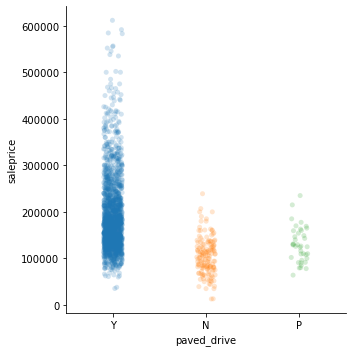

In [348]:
# plot it
sns.catplot(x = 'paved_drive', y='saleprice', data=train, alpha=0.2)

In [349]:
# dummy to is_fully_paved_drive
train.paved_drive = train.paved_drive.map(lambda x: x == 'Y').astype(int)
test.paved_drive = test.paved_drive.map(lambda x: x == 'Y').astype(int)

train.rename(columns = {'paved_drive': 'is_fully_paved_drive'}, inplace = True)
test.rename(columns = {'paved_drive': 'is_fully_paved_drive'}, inplace = True)

train.head().iloc[:,34:44]

,garage_area,garage_qual_Ex_Gd_TA,garage_cond_Ex_Gd_TA,is_fully_paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area
pid,,,,,,,,,,
533352170,475.0,1,1,1,0,44,0,0,0,0
531379050,559.0,1,1,1,0,74,0,0,0,0
535304180,246.0,1,1,1,0,52,0,0,0,0
916386060,400.0,1,1,1,100,0,0,0,0,0
906425045,484.0,1,1,0,0,59,0,0,0,0


In [350]:
# create new variable for porch_sf
train['all_porch_sf'] = train.enclosed_porch + train.open_porch_sf + train.wood_deck_sf + train['3ssn_porch']+train.screen_porch
test['all_porch_sf'] = test.enclosed_porch + test.open_porch_sf + test.wood_deck_sf + test['3ssn_porch']+test.screen_porch

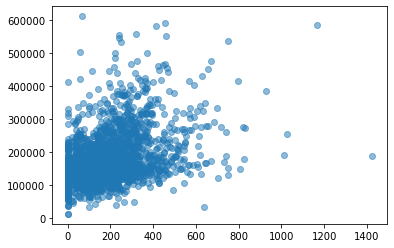

In [351]:
plt.scatter(x = train.all_porch_sf,
            y = train.saleprice,
            alpha = 0.5);

In [352]:
train.all_porch_sf.describe()

count    2045.000000
mean      182.412225
std       158.881544
min         0.000000
25%        49.000000
50%       164.000000
75%       267.000000
max      1424.000000
Name: all_porch_sf, dtype: float64

In [353]:
#creat has porch
has_porch = train.all_porch_sf.map(lambda x: x > 0).astype(int).rename('has_porch')
test_has_porch = test.all_porch_sf.map(lambda x: x > 0).astype(int).rename('has_porch')

train['has_porch'] = has_porch
test['has_porch'] = test_has_porch

train.head().iloc[:,-5:]

,garage_finish_RFn,garage_finish_Unf,garage_finish_Fin,all_porch_sf,has_porch
pid,,,,,
533352170,1,0,0,44,1
531379050,1,0,0,74,1
535304180,0,1,0,52,1
916386060,0,0,1,100,1
906425045,0,1,0,59,1


In [354]:
# drop the porches
train.drop(['enclosed_porch','open_porch_sf','wood_deck_sf','3ssn_porch','screen_porch'],
           axis = 1,
           inplace = True)

test.drop(['enclosed_porch','open_porch_sf','wood_deck_sf','3ssn_porch','screen_porch'],
           axis = 1,
           inplace = True)

train.head().iloc[:,34:44]

,garage_area,garage_qual_Ex_Gd_TA,garage_cond_Ex_Gd_TA,is_fully_paved_drive,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold
pid,,,,,,,,,,
533352170,475.0,1,1,1,0,NaN,NaN,NaN,0,3
531379050,559.0,1,1,1,0,NaN,NaN,NaN,0,4
535304180,246.0,1,1,1,0,NaN,NaN,NaN,0,1
916386060,400.0,1,1,1,0,NaN,NaN,NaN,0,4
906425045,484.0,1,1,0,0,NaN,NaN,NaN,0,3


In [355]:
test.shape, train.shape

((878, 90), (2045, 91))

In [356]:
test.isnull().sum()[30:45]

has_fireplace                   0
fireplace_qu_Ex_Gd              0
garage_type_Attchd_BuiltIn      0
garage_cars                     0
garage_area                     0
garage_qual_Ex_Gd_TA            0
garage_cond_Ex_Gd_TA            0
is_fully_paved_drive            0
pool_area                       0
pool_qc                       874
fence                         706
misc_feature                  837
misc_val                        0
mo_sold                         0
yr_sold                         0
dtype: int64

## Col [38:47] . finished [39:40]

In [357]:
train.columns[38:47]

Index(['pool_area', 'pool_qc', 'fence', 'misc_feature', 'misc_val', 'mo_sold',
       'yr_sold', 'sale_type', 'saleprice'],
      dtype='object')

In [358]:
train.dtypes[38:47]

pool_area        int64
pool_qc         object
fence           object
misc_feature    object
misc_val         int64
mo_sold          int64
yr_sold          int64
sale_type       object
saleprice        int64
dtype: object

In [359]:
train.isnull().sum()[38:47]

pool_area          0
pool_qc         2037
fence           1645
misc_feature    1982
misc_val           0
mo_sold            0
yr_sold            0
sale_type          0
saleprice          0
dtype: int64

In [360]:
test.isnull().sum()[38:47]

pool_area                   0
pool_qc                   874
fence                     706
misc_feature              837
misc_val                    0
mo_sold                     0
yr_sold                     0
sale_type                   0
ms_subclass_above_mean      0
dtype: int64

In [361]:
# investigate pool_qc
train[train.pool_qc.isnull()].pool_area.value_counts()

0    2037
Name: pool_area, dtype: int64

In [362]:
# impute to 'NA'
train.pool_qc = train.pool_qc.map(lambda x: 'NA' if pd.isnull(x) else x)
test.pool_qc = test.pool_qc.map(lambda x: 'NA' if pd.isnull(x) else x)

In [363]:
# investigate fence
train.fence.unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [364]:
# impute to 'NA'
train.fence = train.fence.map(lambda x: 'NA' if pd.isnull(x) else x)
test.fence = test.fence.map(lambda x: 'NA' if pd.isnull(x) else x)

In [365]:
# investigate misc_feature
train[train.misc_feature.isnull()].misc_val.value_counts()

0    1982
Name: misc_val, dtype: int64

In [366]:
# impute to 'NA'
train.misc_feature = train.misc_feature.map(lambda x: 'NA' if pd.isnull(x) else x)
test.misc_feature = test.misc_feature.map(lambda x: 'NA' if pd.isnull(x) else x)

In [367]:
# review pool_area
train.pool_area.value_counts(normalize=True)

0      0.996088
519    0.000489
576    0.000489
800    0.000489
228    0.000489
648    0.000489
738    0.000489
368    0.000489
561    0.000489
Name: pool_area, dtype: float64

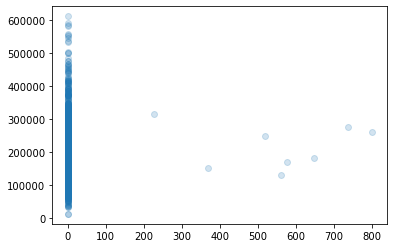

In [368]:
# plot it
plt.scatter(x = train.pool_area, y = train.saleprice, alpha = 0.2);

In [369]:
# drop it
train.drop('pool_area', axis = 1, inplace=True)
test.drop('pool_area', axis = 1, inplace=True)

In [370]:
# review pool_qc
train.pool_qc.value_counts(normalize=True)

NA    0.996088
Gd    0.001467
Fa    0.000978
TA    0.000978
Ex    0.000489
Name: pool_qc, dtype: float64

In [371]:
# drop it
train.drop('pool_qc', axis = 1, inplace=True)
test.drop('pool_qc', axis = 1, inplace=True)

In [372]:
# review fence
train.fence.value_counts(normalize=True)

NA       0.804401
MnPrv    0.111002
GdPrv    0.040587
GdWo     0.039120
MnWw     0.004890
Name: fence, dtype: float64

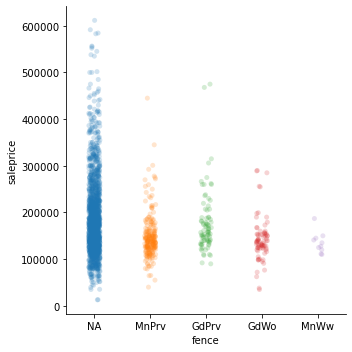

In [373]:
# plot
sns.catplot(x = 'fence', y='saleprice', data=train, alpha=0.2)

In [374]:
# dummy has_fence
train.fence = train.fence.map(lambda x: x == 'NA').astype(int)
test.fence = test.fence.map(lambda x: x == 'NA').astype(int)


train.rename(columns = {'fence': 'has_fence'}, inplace = True)
test.rename(columns = {'fence': 'has_fence'}, inplace = True)

train.head().iloc[:,39:47]

,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,ms_subclass_above_mean,ms_zoning_RL
pid,,,,,,,,
533352170,NA,0,3,2010,WD,130500,1,1
531379050,NA,0,4,2009,WD,220000,1,1
535304180,NA,0,1,2010,WD,109000,1,1
916386060,NA,0,4,2010,WD,174000,1,1
906425045,NA,0,3,2010,WD,138500,0,1


In [375]:
# review misc_feature
train.misc_feature.value_counts(normalize=True)

NA      0.969193
Shed    0.026895
Gar2    0.001956
Othr    0.001467
TenC    0.000489
Name: misc_feature, dtype: float64

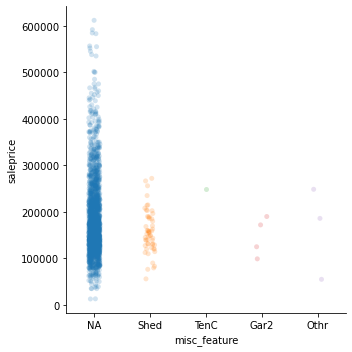

In [376]:
# plot it
sns.catplot(x = 'misc_feature', y='saleprice', data=train, alpha=0.2)

In [377]:
# drop it
train.drop('misc_feature', axis = 1, inplace=True)
test.drop('misc_feature', axis = 1, inplace=True)

In [378]:
# review misc_val
train.misc_val.value_counts(normalize=True)

0        0.969193
400      0.005868
500      0.003423
600      0.002934
450      0.002445
2000     0.002445
700      0.001956
1200     0.000978
2500     0.000978
3000     0.000978
4500     0.000978
1300     0.000489
1150     0.000489
1500     0.000489
800      0.000489
6500     0.000489
54       0.000489
900      0.000489
460      0.000489
300      0.000489
455      0.000489
8300     0.000489
3500     0.000489
12500    0.000489
480      0.000489
650      0.000489
80       0.000489
Name: misc_val, dtype: float64

In [379]:
# drop it
train.drop('misc_val', axis = 1, inplace=True)
test.drop('misc_val', axis = 1, inplace=True)

In [380]:
# review mo_sold
train.mo_sold.unique()

train.mo_sold.value_counts(normalize=True)

6     0.171149
7     0.147677
5     0.125672
4     0.101711
3     0.082152
8     0.081663
10    0.059658
9     0.053301
2     0.050856
11    0.049878
1     0.038142
12    0.038142
Name: mo_sold, dtype: float64

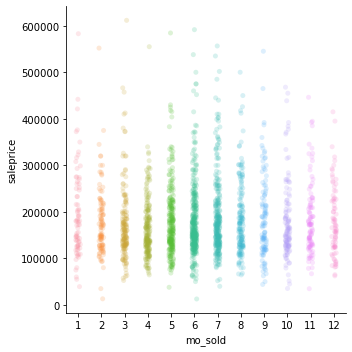

In [381]:
# plot it
sns.catplot(x = 'mo_sold', y='saleprice', data=train, alpha=0.2)

In [382]:
# maybe link with yr sold
# review with yr sold
train.yr_sold.unique()

train.yr_sold.value_counts(normalize=True)

2007    0.242054
2009    0.218093
2006    0.214181
2008    0.211247
2010    0.114425
Name: yr_sold, dtype: float64

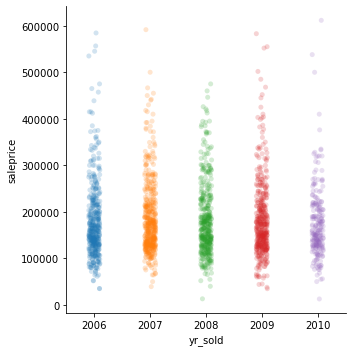

In [383]:
# plot it
sns.catplot(x = 'yr_sold', y='saleprice', data=train, alpha=0.2)

In [384]:
train.groupby('yr_sold').mean().saleprice

yr_sold
2006    179471.609589
2007    185107.793939
2008    181422.944444
2009    182455.244395
2010    174180.059829
Name: saleprice, dtype: float64

In [385]:
train.groupby('mo_sold').mean().saleprice

mo_sold
1     195576.641026
2     177626.519231
3     174625.779762
4     163901.269231
5     180332.369650
6     182052.300000
7     188253.208609
8     186927.359281
9     188990.761468
10    179297.459016
11    183812.568627
12    182459.615385
Name: saleprice, dtype: float64

In [386]:
# premium months
sold_premium_month = train.mo_sold.map(train.groupby('mo_sold').mean().saleprice > saleprice_mean).astype(int)
test_sold_premium_month = test.mo_sold.map(train.groupby('mo_sold').mean().saleprice > saleprice_mean).astype(int)

train['sold_premium_month']= sold_premium_month
test['sold_premium_month']= test_sold_premium_month

In [387]:
# dummy years
yr_sold_dummies = pd.get_dummies(train.yr_sold, prefix = 'yr_sold')\
                  .loc[:,['yr_sold_2006','yr_sold_2007','yr_sold_2008','yr_sold_2009']]

test_yr_sold_dummies = pd.get_dummies(test.yr_sold, prefix = 'yr_sold')\
                  .loc[:,['yr_sold_2006','yr_sold_2007','yr_sold_2008','yr_sold_2009']]

train = train.join(yr_sold_dummies)
test = test.join(test_yr_sold_dummies)

In [388]:
# drop year and month
train.drop(['mo_sold','yr_sold'],
           axis = 1,
           inplace=True)

test.drop(['mo_sold','yr_sold'],
           axis = 1,
           inplace=True)

train.head().iloc[:,39:47]

,sale_type,saleprice,ms_subclass_above_mean,ms_zoning_RL,ms_zoning_FV,lot_config_Inside,lot_config_Corner,neighborhood_group
pid,,,,,,,,
533352170,WD,130500,1,1,0,0,0,1
531379050,WD,220000,1,1,0,0,0,2
535304180,WD,109000,1,1,0,1,0,1
916386060,WD,174000,1,1,0,1,0,2
906425045,WD,138500,0,1,0,1,0,2


In [389]:
# review sale type
train.sale_type.unique()

train.sale_type.value_counts(normalize=True)

WD       0.868949
New      0.077262
COD      0.030807
ConLD    0.008313
CWD      0.004890
ConLI    0.003423
ConLw    0.002445
Con      0.001956
Oth      0.001956
Name: sale_type, dtype: float64

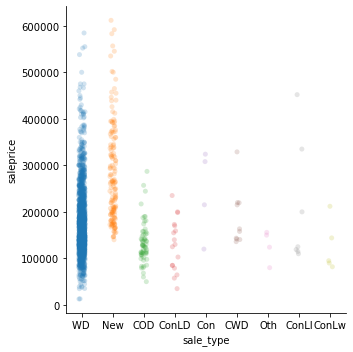

In [390]:
#plot it
sns.catplot(x = 'sale_type', y='saleprice', data=train, alpha=0.2);

In [391]:
# dummy to is WD and is New
sale_type_WD = train.sale_type.map(lambda x: x == 'WD').astype(int).rename('sale_type_WD')
sale_type_New = train.sale_type.map(lambda x: x == 'New').astype(int).rename('sale_type_New')

test_sale_type_WD = test.sale_type.map(lambda x: x == 'WD').astype(int).rename('sale_type_WD')
test_sale_type_New = test.sale_type.map(lambda x: x == 'New').astype(int).rename('sale_type_New')

train = train.join([sale_type_WD,sale_type_New])
test = test.join([test_sale_type_WD,test_sale_type_New
                 
                 
                 
                 
                 
                 
                 
                 ])

train.head().iloc[:,-5:]

,yr_sold_2007,yr_sold_2008,yr_sold_2009,sale_type_WD,sale_type_New
pid,,,,,
533352170,0,0,0,0,0
531379050,0,0,1,0,0
535304180,0,0,0,0,0
916386060,0,0,0,0,0
906425045,0,0,0,0,0


In [392]:
# drop sale_type
train.drop('sale_type', axis=1, inplace=True)
test.drop('sale_type', axis=1, inplace=True)


train.head().iloc[:,39:47]

,saleprice,ms_subclass_above_mean,ms_zoning_RL,ms_zoning_FV,lot_config_Inside,lot_config_Corner,neighborhood_group,neighborhood_group_1
pid,,,,,,,,
533352170,130500,1,1,0,0,0,1,1
531379050,220000,1,1,0,0,0,2,0
535304180,109000,1,1,0,1,0,1,1
916386060,174000,1,1,0,1,0,2,0
906425045,138500,0,1,0,1,0,2,0


In [393]:
test.shape, train.shape

((878, 90), (2045, 91))

In [394]:
test.isnull().sum()[-14:]

garage_new_2006       0
has_garage            0
garage_finish_RFn     0
garage_finish_Unf     0
garage_finish_Fin     0
all_porch_sf          0
has_porch             0
sold_premium_month    0
yr_sold_2006          0
yr_sold_2007          0
yr_sold_2008          0
yr_sold_2009          0
sale_type_WD          0
sale_type_New         0
dtype: int64

## Finalize columns

In [395]:
train.columns


Index(['lot_frontage', 'lot_area', 'has_alley', 'is_lot_shape_regluar',
       'is_land_contour_lvl', 'land_slope_is_Gtl', 'overall_qual',
       'overall_cond', 'mas_vnr_area', 'exter_qual_Ex_Gd', 'exter_cond_Ex_Gd',
       'bsmt_qual_Ex_Gd', 'bsmt_cond_is_TA_Gd_Ex', 'has_bsmt_exposure',
       'bsmt_unf_sf', 'total_bsmt_sf', 'is_heating_qc_Ex', 'has_central_air',
       'electrical_is_SBrkr', '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_qual_Ex_Gd', 'totrms_abvgrd', 'is_functional',
       'has_fireplace', 'fireplace_qu_Ex_Gd', 'garage_type_Attchd_BuiltIn',
       'garage_cars', 'garage_area', 'garage_qual_Ex_Gd_TA',
       'garage_cond_Ex_Gd_TA', 'is_fully_paved_drive', 'has_fence',
       'saleprice', 'ms_subclass_above_mean', 'ms_zoning_RL', 'ms_zoning_FV',
       'lot_config_Inside', 'lot_config_Corner', 'neighborhood_group',
       'neighborhood_group_1', 'neighborhood_group_2', '

# Save and Export files

In [396]:
train.to_csv('datasets/train_cleaned.csv')
test.to_csv('datasets/test_cleaned.csv')